In [1]:
1+1

2

In [2]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
#from unc_funcs import *
from unc_samples import *
    # Note Sept. 5, 2024: unc_samples does not force any (un)containment.
    

[0.39431672 0.04210058 0.91800973]
evtdf.shape before enforcing correct FV w/ uncontained track lenght: (922707, 264)
evtdf.shape after enforcing correct FV w/ uncontained track lenght: (888306, 264)


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib

9.998841808747233e-06, 89.92287898434903


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/nb/unc_funcs.py:451: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ppdf = scalar_mom - scalar_mom.dot(BEAMDIR)[:,np.newaxis]*np.repeat([BEAMDIR], repeats=scalar_mom.shape[0], axis=0)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/nb/unc_funcs.py:451: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ppdf = scalar_mom - scalar_mom.dot(BEAMDIR)[:,np.newaxis]*np.repeat([BEAMDIR], repeats=scalar_mom.shape[0], axis=0)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/di

# After this point, each section separated by a Header should be able to run independently from one another.

## WIP: Look into theta_NuMI truth

Notes on the contents of the dataframes: See notes file (in app) dated 24/08/16.

In [ ]:
%%time

# EXTREMELY SLOW
# Add the true POIdir to evtdf (currently stored in nudfs):
new_evtdfs = []
for i, df in enumerate(evtdfs):
    print('i: ', i)
    new_df = df.copy()
    new_df["true_POIdir_x"] = -100
    new_df["true_POIdir_y"] = -100
    new_df["true_POIdir_z"] = -100
    if i>9: continue
    for idx in new_df.index:
        new_df.loc[(idx[0],idx[1])].true_POIdir_x = mcnudfs[i].loc[(idx[0],idx[1])].POIdir_x
        new_df.loc[(idx[0],idx[1])].true_POIdir_y = mcnudfs[i].loc[(idx[0],idx[1])].POIdir_y
        new_df.loc[(idx[0],idx[1])].true_POIdir_z = mcnudfs[i].loc[(idx[0],idx[1])].POIdir_z
    new_evtdfs.append(new_df)
evtdfs = new_evtdfs

In [ ]:
#SKIP

f = h5py.File(higgs_files[0], 'r')
print(f.keys())

hdr = hdrs[0] # ntuple, entry
print(hdr.shape)
evtdf = evtdfs[0] # __ntuple, entry, rec.slc..index
print(evtdf.shape) # this one smaller b/c of preselection.
mcnu = mcnudfs[0] # __ntuple, entry, rec.mc.nu..index
print(mcnu.shape)
#for c in mcnu.columns: print(c)

mcnu.query('entry > 0')
mcnu.query('`rec.mc.nu..index` == 0')
mcnu.query('`rec.mc.nu..index` > 0')

## All my attempts to merge the indices below are not working. (It should be a simple join! hmph.)
## Later, see if/how it's done when evtdf is made.er
## For now (Aug 20), just leave it (doing it the slow way takes too long). Look at evt selection performance.
#df = evtdf.reset_index('rec.slc..index').join(mcnu.reset_index('rec.mc.nu..index')[["POIdir_x", "POIdir_y", "POIdir_z"]],on=['__ntuple','entry']).set_index(evtdf.index.names)
#df = evtdf.join(mcnu[["POIdir_x", "POIdir_y", "POIdir_z"]], on=["__ntuple","entry"]) #, how='left')
#df = evtdf.join(mcnu[["POIdir_x", "POIdir_y", "POIdir_z"]], on=["`__ntuple`","entry"]) #, how='left')
#df = evtdf.set_index(["__nutple","entry"]).merge(mcnu.set_index(["__nutple","entry"]))
#df = evtdf.reset_index().merge(mcnu.reset_index()[["POIdir_x", "POIdir_y", "POIdir_z"]],on=['__ntuple','entry']).set_index(evtdf.index.names)
#df = evtdf.merge(mcnu[["POIdir_x", "POIdir_y", "POIdir_z"]], on=['__ntuple','entry'], how='outer')
#df = evtdf.merge(mcnu, how='left', left_index=True, right_on=["__ntuple","entry"]) # , on=["__ntuple","entry"]

In [ ]:
f = h5py.File(nu_file, 'r')
print(f.keys())

# Explore a Higgs File:

print('\nhiggs_mch:')
higgs_mch = pd.read_hdf(higgs_files[0], key="mch")
print(higgs_mch.shape)
for c in higgs_mch.columns: print(c)
print(min(higgs_mch.E))
# The energy is the total energy: rest + momentum
higgs_mch['pmag']=np.sqrt(higgs_mch.E*higgs_mch.E - higgs_mch.M*higgs_mch.M)
higgs_mch[['E', 'M', 'pmag']]

print('\nhiggs_mcnu:')
higgs_mcnu = pd.read_hdf(higgs_files[0], key="mcnu")
print(higgs_mcnu.shape)
for c in higgs_mcnu.columns: print(c)
higgs_mcnu['pmag'] = np.sqrt(
    (higgs_mcnu.momentum.x * higgs_mcnu.momentum.x) +
    (higgs_mcnu.momentum.y * higgs_mcnu.momentum.y) +
    (higgs_mcnu.momentum.z * higgs_mcnu.momentum.z)
)

#higgs_mcnu.momentum

In [ ]:
higgs_mch.exit

In [ ]:
higgs_mch.enter

In [ ]:
Sdir = higgs_mch.exit-higgs_mch.enter
Sdir_mag = np.linalg.norm(Sdir, axis=1)
higgs_mch_Sdir = Sdir/Sdir_mag[:, None]
print(higgs_mch_Sdir.shape)
higgs_mch_Sdir

In [ ]:
higgs_mcnu_momDir_mag = np.linalg.norm(higgs_mcnu.momentum, axis=1)
higgs_mcnu_momDir = higgs_mcnu.momentum/higgs_mcnu_momDir_mag[:, None]
print(higgs_mcnu_momDir.shape)
higgs_mcnu_momDir
higgs_mcnu.momentum
print(min(higgs_mcnu.momentum.x), max(higgs_mcnu.momentum.x), sep=', ')
print(min(higgs_mcnu.momentum.y), max(higgs_mcnu.momentum.y), sep=', ')
print(min(higgs_mcnu.momentum.z), max(higgs_mcnu.momentum.z), sep=', ')

In [ ]:
print(min(higgs_mcnu_momDir-higgs_mch_Sdir), max(higgs_mcnu_momDir-higgs_mch_Sdir), sep=', ')

In [ ]:
print(min(higgs_mcnu_momDir-higgs_mch_Sdir), max(higgs_mcnu_momDir-higgs_mch_Sdir), sep=', ')

In [ ]:
# Explore a Nu File:

print('\nnu_mch:')
nu_mch = pd.read_hdf(nu_file, key="mch")
#for c in nu_mch.columns: print(c)
print(nu_mch.shape)

print('\nnu_mcnu:')
nu_mcnu = pd.read_hdf(nu_file, key="mcnu")
#for c in nu_mcnu.columns: print(c)
nu_mcnu['pmag'] = np.sqrt(
    (nu_mcnu.momentum.x * nu_mcnu.momentum.x) +
    (nu_mcnu.momentum.y * nu_mcnu.momentum.y) +
    (nu_mcnu.momentum.z * nu_mcnu.momentum.z)
)
print(min(nu_mcnu.momentum.x), max(nu_mcnu.momentum.x), sep=', ')
print(min(nu_mcnu.momentum.y), max(nu_mcnu.momentum.y), sep=', ')
print(min(nu_mcnu.momentum.z), max(nu_mcnu.momentum.z), sep=', ')

In [ ]:
nu_mcnu.momentum


In [ ]:
nudir = nu_mcnu.momentum
nudir_mag = np.linalg.norm(nudir, axis=1)
nu_mcnu_nudir = nudir/nudir_mag[:, None]
print(nu_mcnu_nudir.shape)
nu_mcnu_nudir

## Compare different methods of getting theta_NuMI

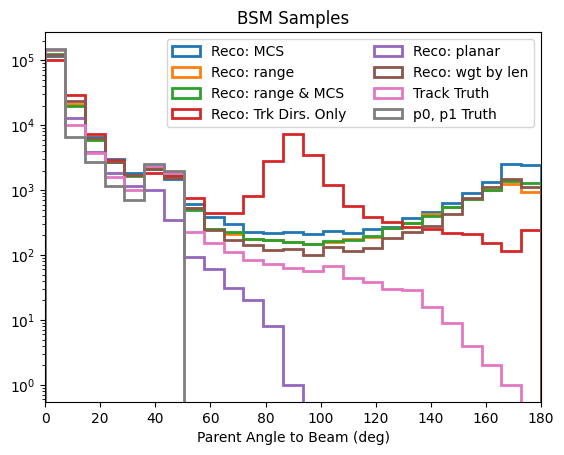

In [20]:
## See difference for NuMI Angle:
mybins = 25
myrange=(0,180.)
#myDensity = True

df = evtdf[make_categories(evtdf)[0]]
mcs_hist = plt.hist(df.Snumi_angle_mcs*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: MCS', range=myrange)
plt.hist(df.Snumi_angle_rangeBased*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: range', range=myrange)
plt.hist(df.Snumi_angle_hybrid_rangeMCS*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: range & MCS', range=myrange)
plt.hist(df.Snumi_angle_trkDirOnly*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: Trk Dirs. Only', range=myrange)
planar_hist = plt.hist(df.Snumi_angle_planar*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: planar', range=myrange)
plt.hist(df.Snumi_angle_wgtByLen*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Reco: wgt by len', range=myrange)
plt.hist(df.Snumi_angle_trueTrk*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Track Truth', range=myrange)
p01_truth_hist = plt.hist(df.Snumi_angle_trueParticle*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='p0, p1 Truth', range=myrange)
plt.legend(fontsize=10, ncols=2)
plt.yscale("log")
plt.xlim(myrange)
plt.xlabel("Parent Angle to Beam (deg)")
#plt.title("Full dataset: all signal and all bg events")
plt.title("BSM Samples")
plt.show()

# Notes: forget about track dirs only method. The bump is confusing - probably attributed to Michelles or something - and others will get totally hung up on it.

## Compare different methods of getting phi_NuMI

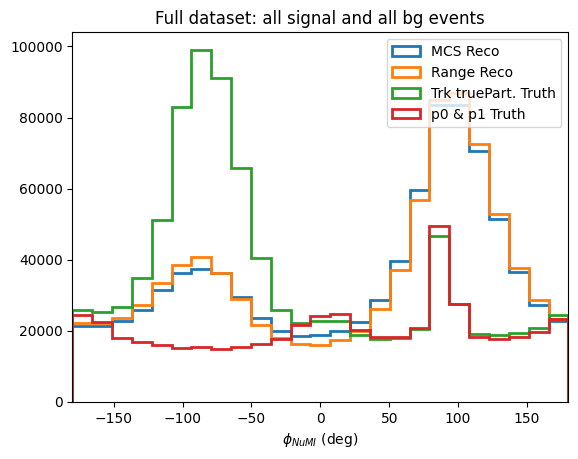

In [3]:
mybins = 25
myrange=(-180,180.)
#categories = make_categories(evtdf, detailed_bsm=True)
myDensity = False
df = evtdf
plt.hist(df.phi_NuMI_mcs*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='MCS Reco', range=myrange, density=myDensity)
plt.hist(df.phi_NuMI_rangeBased*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Range Reco', range=myrange, density=myDensity)
plt.hist(df.phi_NuMI_trueTrk*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Trk truePart. Truth', range=myrange, density=myDensity)
plt.hist(df.phi_NuMI_trueParticle*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='p0 & p1 Truth', range=myrange, density=myDensity)
plt.legend()#loc='upper left')
plt.xlabel("$\phi_{NuMI}$ (deg)")
#plt.title(c.name)
plt.title("Full dataset: all signal and all bg events")
plt.xlim(myrange)
plt.show()

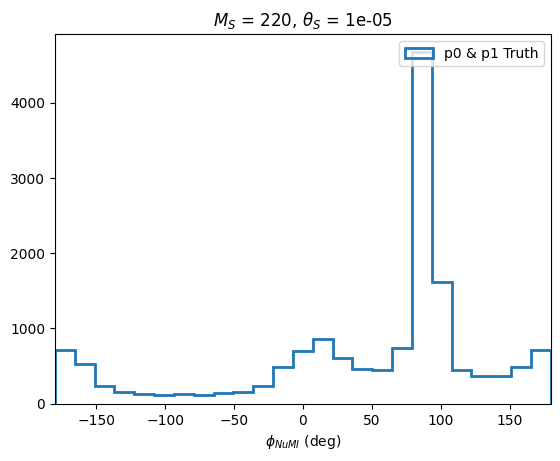

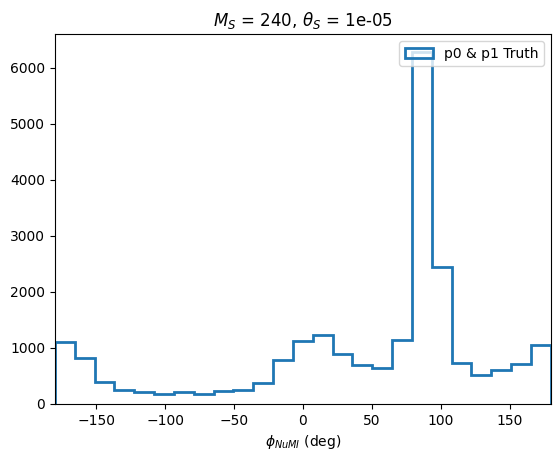

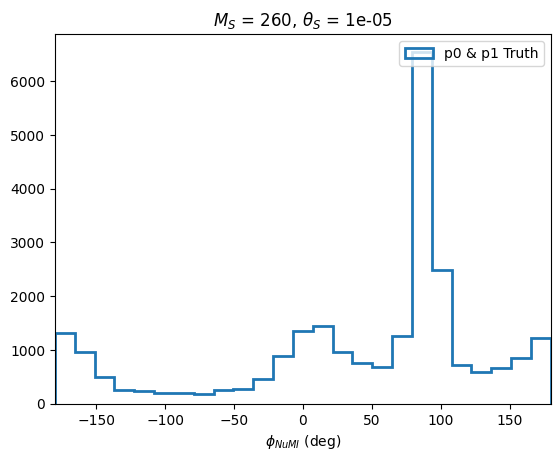

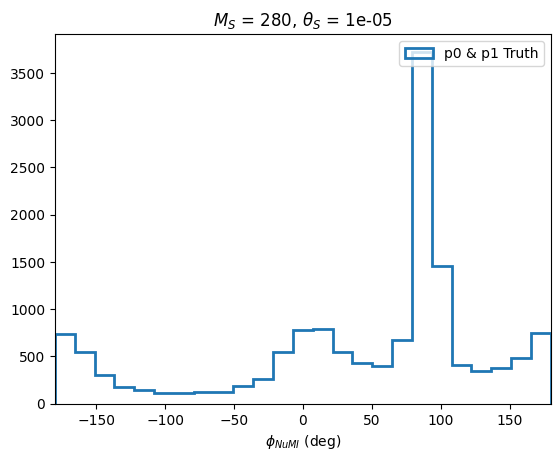

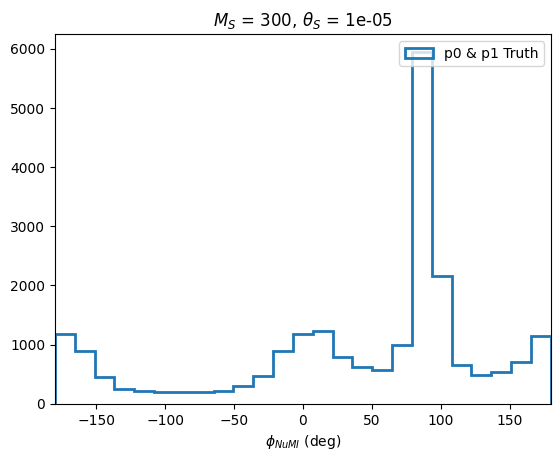

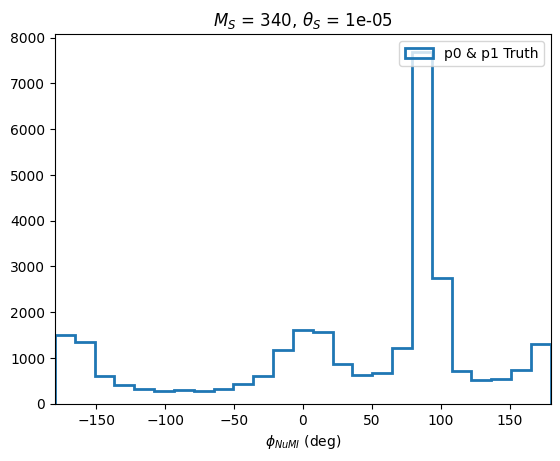

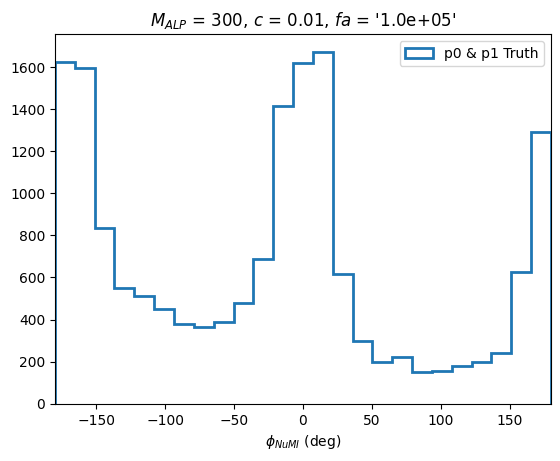

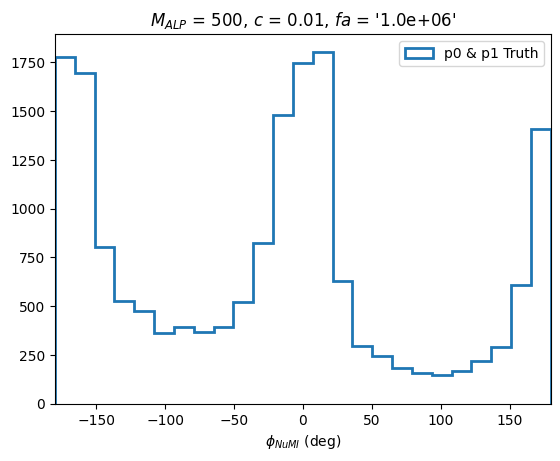

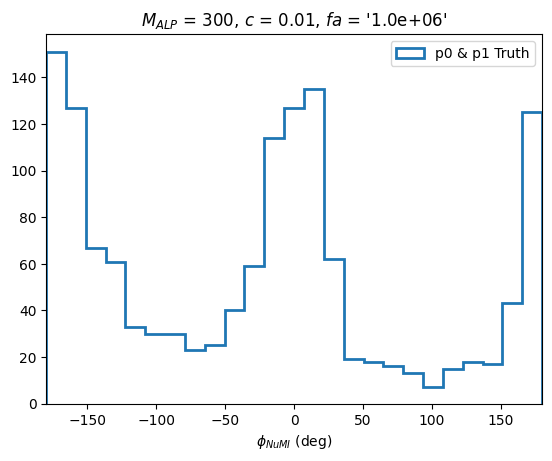

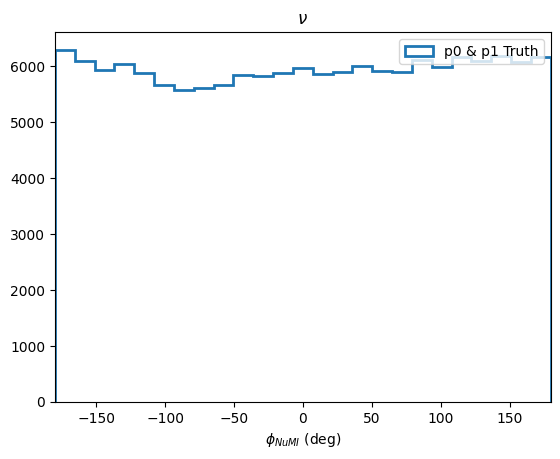

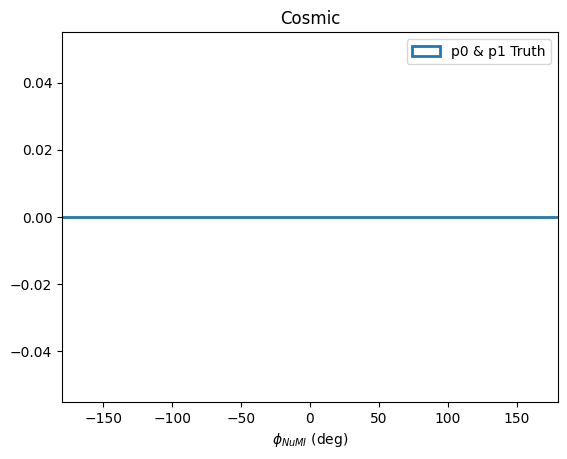

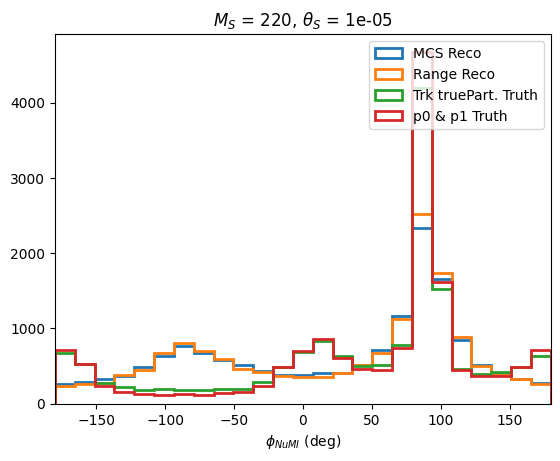

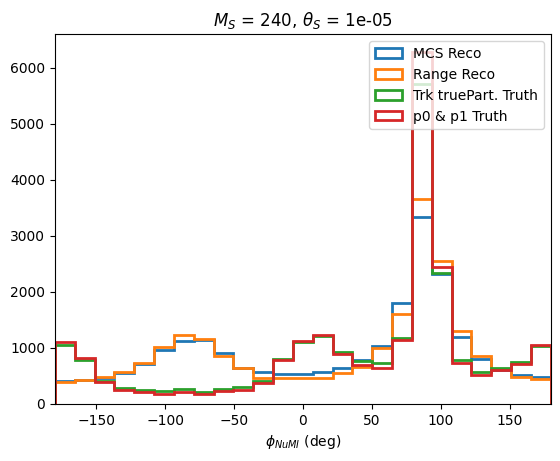

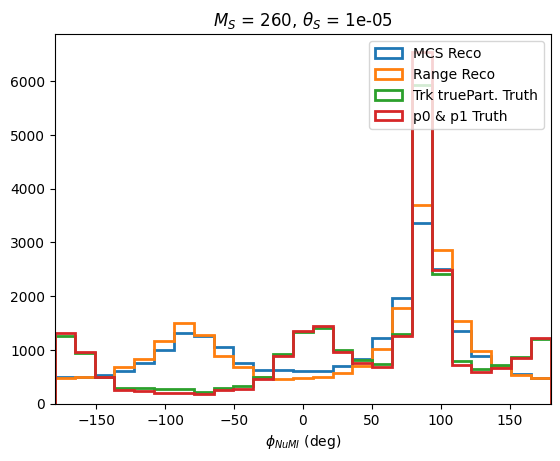

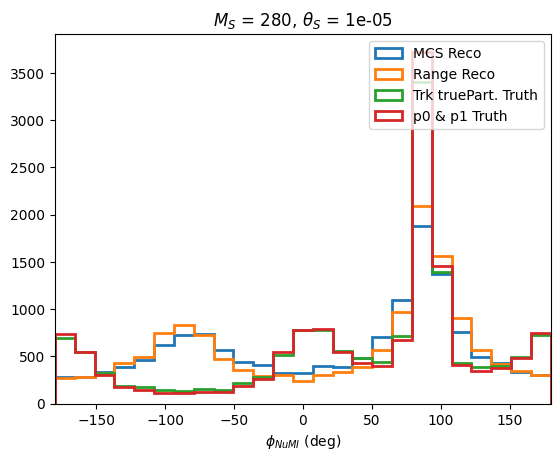

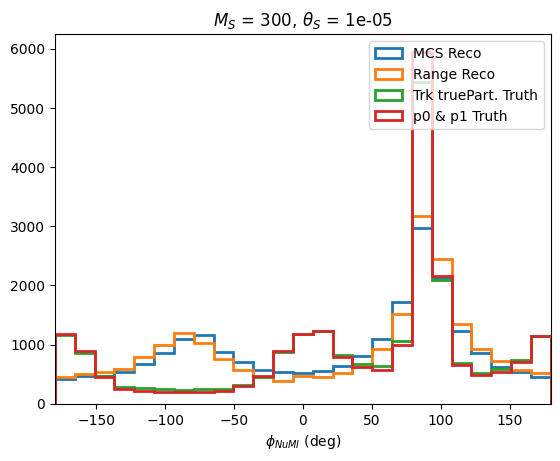

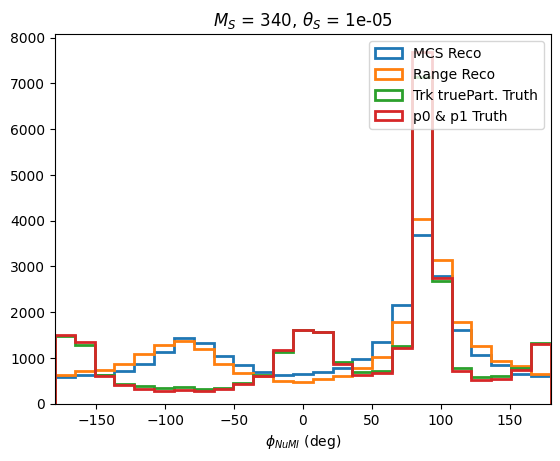

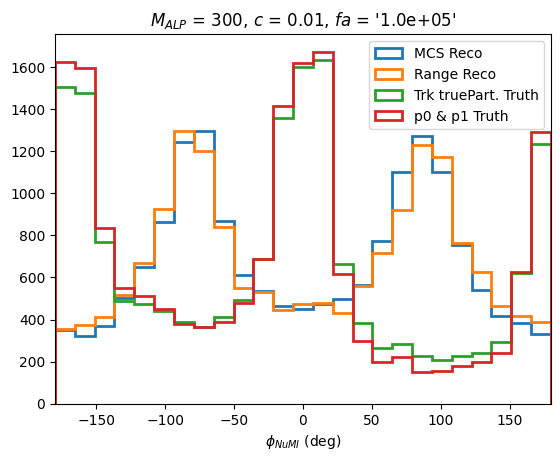

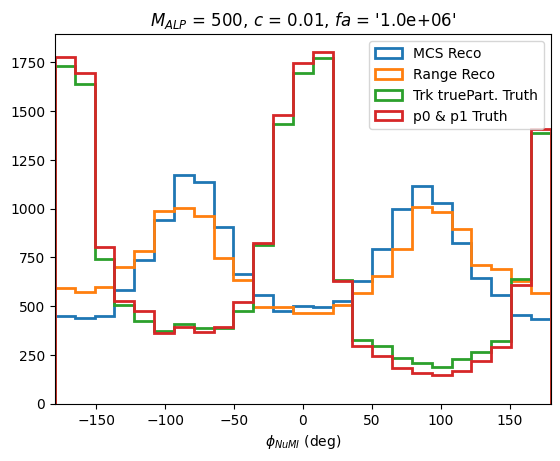

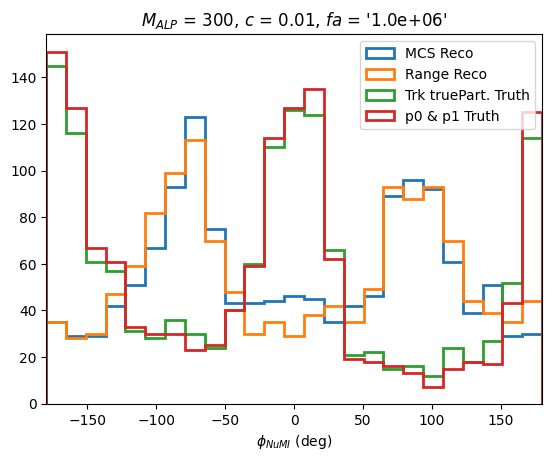

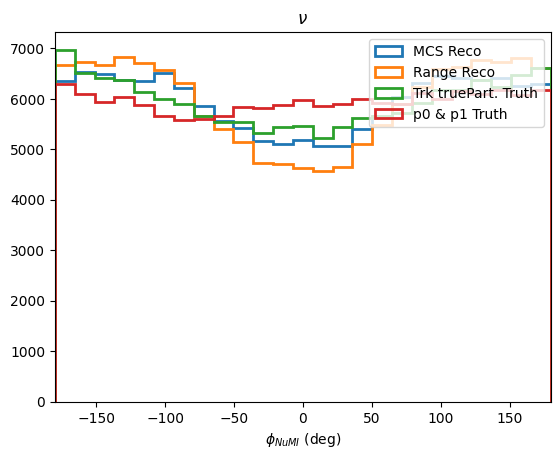

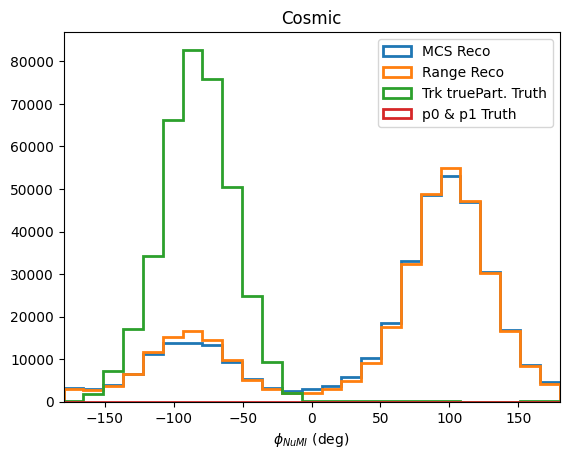

In [4]:
## See difference for phi_NuMI Angle, by category:

mybins = 25
myrange=(-180,180.)
categories = make_categories(evtdf, detailed_bsm=True)
myDensity = False

for c in categories:#[:-1]:
    df = evtdf[c]
    plt.hist(df.phi_NuMI_trueParticle*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='p0 & p1 Truth', range=myrange, density=myDensity)
    plt.legend()#loc='upper left')
    plt.xlabel("$\phi_{NuMI}$ (deg)")
    plt.title(c.name)
    #plt.title("Full dataset: all signal and all bg events")
    plt.xlim(myrange)
    plt.show()
    # Discussion: I think the truth information in the ALPs files is messed up! 
    # Giovanni was also seeing weird truth stuff when looking into MCS stuff for those samples.
    
for c in categories:#[:-1]:
    df = evtdf[c]
    plt.hist(df.phi_NuMI_mcs*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='MCS Reco', range=myrange, density=myDensity)
    plt.hist(df.phi_NuMI_rangeBased*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Range Reco', range=myrange, density=myDensity)
    plt.hist(df.phi_NuMI_trueTrk*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='Trk truePart. Truth', range=myrange, density=myDensity)
    plt.hist(df.phi_NuMI_trueParticle*180./math.pi, bins=mybins, linewidth=2, histtype='step', label='p0 & p1 Truth', range=myrange, density=myDensity)
    plt.legend()#loc='upper left')
    plt.xlabel("$\phi_{NuMI}$ (deg)")
    plt.title(c.name)
    #plt.title("Full dataset: all signal and all bg events")
    plt.xlim(myrange)
    plt.show()
    
    #plt.hist((df.phi_NuMI_mcs-df.phi_NuMI_trueParticle)*180./math.pi, bins=mybins, 
    #         linewidth=2, histtype='step', density=myDensity, range=(-180,180))
    #plt.xlabel("MCS $\phi_{NuMI}$ - True Particle $\phi_{NuMI}$ (deg)")
    #plt.title(c.name)
    ##plt.title("Full dataset: all signal and all bg events")
    #plt.xlim(myrange)
    #plt.show()

## Plot p0 and p1 true momentum for all the categories to see if ALPs look out of the ordinary

(16748, 279)
(17509, 279)
(1375, 279)


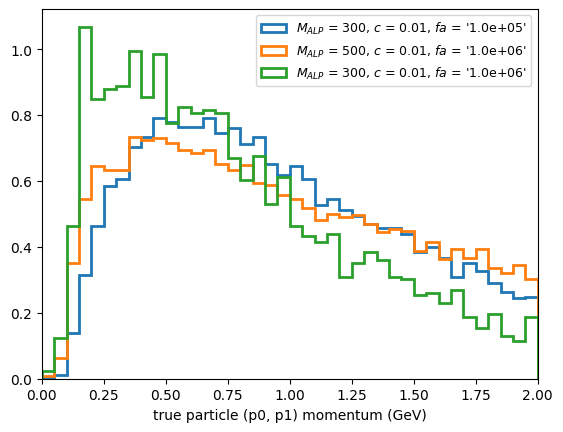

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


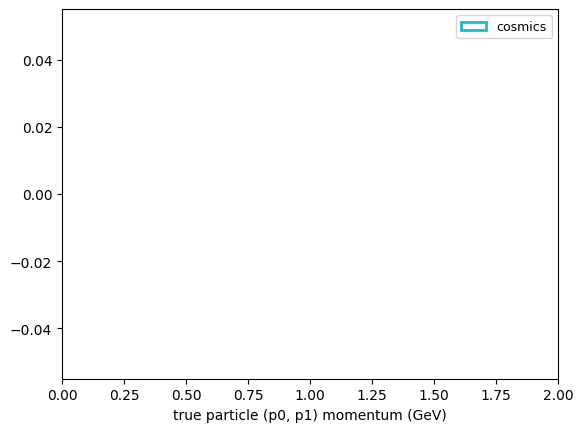

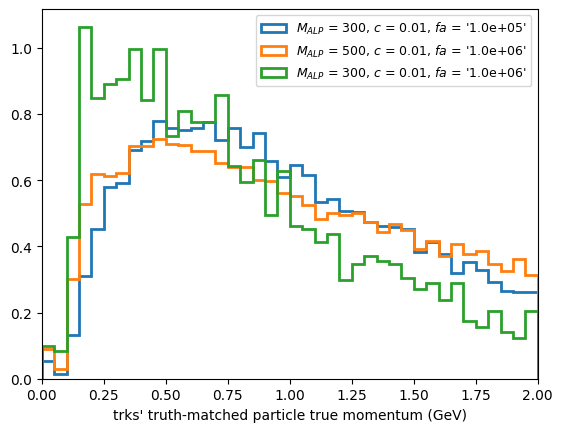

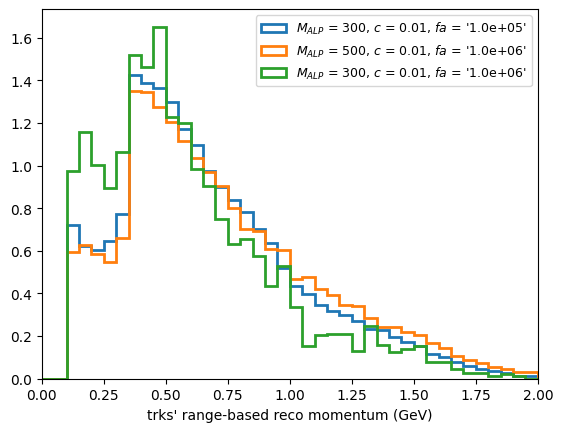

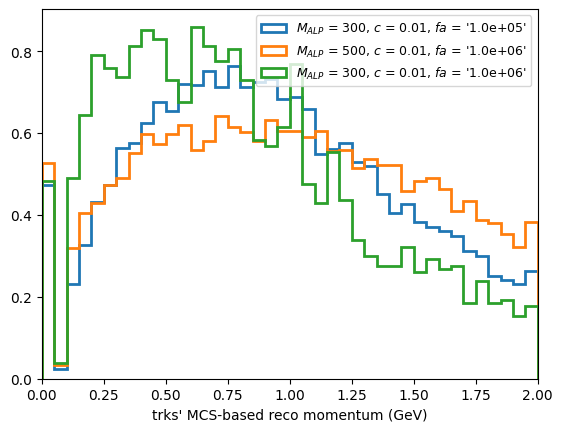

In [5]:
categories = make_categories(evtdf, detailed_bsm=True)[6:9]
myrange = (0,2.)
mybins=40
myDensity=True
for c in categories:#[:-1]:
    df = evtdf[c]
    print(df.shape)
    var = np.concatenate(( getp(df.slc.truth.p0, 'p0_p1_truth'), getp(df.slc.truth.p1, 'p0_p1_truth') ))
    plt.hist(var, bins=mybins, linewidth=2, histtype='step', label=c.name, range=myrange, density=myDensity)
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel("true particle (p0, p1) momentum (GeV)")
plt.xlim(myrange)
plt.show()

df = evtdf[make_categories(evtdf)[-1]]
var = np.concatenate(( getp(df.slc.truth.p0, 'p0_p1_truth'), getp(df.slc.truth.p1, 'p0_p1_truth') ))
plt.hist(var, bins=mybins, linewidth=2, histtype='step', label='cosmics', range=myrange, density=myDensity, color='C9')
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel("true particle (p0, p1) momentum (GeV)")
plt.xlim(myrange)
plt.show()

# Plot tracks' truth-matched particle true momenta for all the categories to see if ALPs look out of the oridinary.
myrange = (0,2.)
mybins=40
myDensity=True
for c in categories:#[:-1]:
    df = evtdf[c]
    var = np.concatenate(( getp(df.trunk.trk, 'track_truth'), getp(df.branch.trk, 'track_truth') ))
    plt.hist(var, bins=mybins, linewidth=2, histtype='step', label=c.name, range=myrange, density=myDensity)
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel("trks' truth-matched particle true momentum (GeV)")
plt.xlim(myrange)
plt.show()

# Plot tracks' truth-matched particle true momenta for all the categories to see if ALPs look out of the oridinary.
myrange = (0,2.)
mybins=40
myDensity=True
for c in categories:#[:-1]:
    df = evtdf[c]
    var = np.concatenate(( getp(df.trunk.trk, 'range'), getp(df.branch.trk, 'range') ))
    plt.hist(var, bins=mybins, linewidth=2, histtype='step', label=c.name, range=myrange, density=myDensity)
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel("trks' range-based reco momentum (GeV)")
plt.xlim(myrange)
plt.show()

# Plot tracks' truth-matched particle true momenta for all the categories to see if ALPs look out of the oridinary.
myrange = (0,2.)
mybins=40
myDensity=True
for c in categories:#[:-1]:
    df = evtdf[c]
    var = np.concatenate(( getp(df.trunk.trk, 'mcs'), getp(df.branch.trk, 'mcs') ))
    plt.hist(var, bins=mybins, linewidth=2, histtype='step', label=c.name, range=myrange, density=myDensity)
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel("trks' MCS-based reco momentum (GeV)")
plt.xlim(myrange)
plt.show()

## Compare Opening Angle when using true momenta for tracks vs. for particles

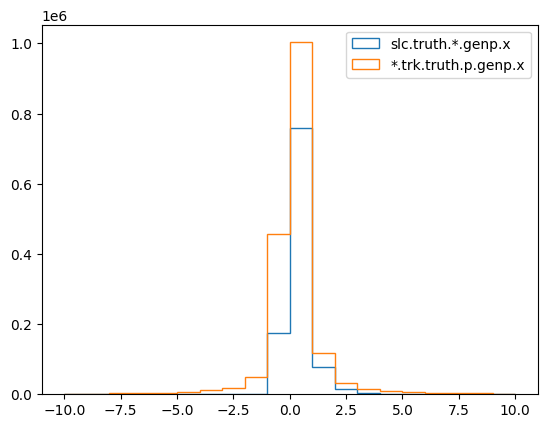

In [6]:
## Compare opening angle when using true momenta for tracks vs. for particles:
myrange = (-10,10)
mybins = 20
plt.hist(np.concatenate((np.array(evtdf.slc.truth.p0.genp.x), np.array(evtdf.slc.truth.p1.genp.x))), histtype='step', range=myrange, bins=mybins, label='slc.truth.*.genp.x')
plt.hist(np.concatenate((np.array(evtdf.trunk.trk.truth.p.genp.x), np.array(evtdf.branch.trk.truth.p.genp.x))), histtype='step', range=myrange, bins=mybins, label='*.trk.truth.p.genp.x')
plt.legend()
plt.show()

## Is track direction determined from start and end point of track?
If not, then it's likely determined from some segment at start of track. 

### Found answer: No.

In [ ]:
traj = evtdf.trunk.trk.end - evtdf.trunk.trk.start
traj_norm = traj.apply(np.linalg.norm, axis=1)
traj.x = traj.x/traj_norm
traj.y = traj.y/traj_norm
traj.z = traj.z/traj_norm
#traj

## Then Compare the following:
#traj
#evtdf.trunk.trk.dir
# genp direction


## Did any clear cosmics pass the preselection?
### Answer: No
```python
print(max(evtdf.slc.is_clear_cosmic))
```

## Are there any events saved that have pions in the final state?
### Answer: No.

In [18]:
# cell does not work with detailed_hps in categories.
print(len(mcnudfs))
for i, c, in enumerate(categories[:-3]):
    print(c.name)
    #print(evtdf[c].shape)
    print(mcnudfs[i].shape)
    mu_mask = mcnudfs[i].nmu == 2
    pi_mask = mcnudfs[i].npi == 2
    print(mcnudfs[i][mu_mask].shape)
    print(mcnudfs[i][pi_mask].shape)
    

11
$M_S$ = 220, $\theta_S$ = 1e-05
(91000, 53)
(90872, 53)
(0, 53)
$M_S$ = 240, $\theta_S$ = 1e-05
(91900, 53)
(91837, 53)
(0, 53)
$M_S$ = 260, $\theta_S$ = 1e-05
(91350, 53)
(91282, 53)
(0, 53)
$M_S$ = 280, $\theta_S$ = 1e-05
(50100, 53)
(50067, 53)
(0, 53)
$M_S$ = 300, $\theta_S$ = 1e-05
(76500, 53)
(76433, 53)
(0, 53)
$M_S$ = 340, $\theta_S$ = 1e-05
(95250, 53)
(95163, 53)
(0, 53)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
(59900, 54)
(59896, 54)
(0, 54)
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
(49700, 54)
(49676, 54)
(0, 54)


## Preselection Performance

I want to know how many events each sample had to start.

Two equivalent ways of getting the original number of MC events generated in the sample are shown in the last two printed quantities in the for loop above(??). 

By far, the easier of the two is just shape of hdr dataframe, the the other is perhaps more explicit.

BUTTTTT!!! There is a mismatch for neutrinos :(

Gray says this can happen when a filter is applied, but this shouldn't be the case here. The mismatch is a mystery, but it is best to default to the shape of hdr df. Indeed, that is the more reasonable value here anyway.

In [7]:
# TODO: These numbers are surprising to me! Why are they so low for signal, and especially for Coh-like???
# maybe they're low for signal due to cosmics overlays resulting in many weirdly-reconstructed events?

ngen = [np.sum(hdr.ngenevt * hdr.first_in_subrun) for hdr in hdrs]
#for col in hdrs[0].columns:
#    print(col)
print("Preselected Events (w/out any requirement on containment) / Generated Events : ")
for i, df in enumerate(evtdfs):
    print(labels[i]+': %a / %a = %a' % (df.shape[0], ngen[i], df.shape[0]/ngen[i]))
#hdrs[0]

Preselected Events (w/out any requirement on containment) / Generated Events : 
$M_S$ = 220, $\theta_S$ = 1e-05: 27498 / 91000 = 0.30217582417582417
$M_S$ = 240, $\theta_S$ = 1e-05: 35153 / 91900 = 0.38251360174102284
$M_S$ = 260, $\theta_S$ = 1e-05: 37538 / 91350 = 0.4109250136836344
$M_S$ = 280, $\theta_S$ = 1e-05: 21282 / 50100 = 0.42479041916167665
$M_S$ = 300, $\theta_S$ = 1e-05: 32845 / 76500 = 0.42934640522875817
$M_S$ = 340, $\theta_S$ = 1e-05: 41218 / 95250 = 0.43273490813648297
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05': 24721 / 59900 = 0.41270450751252086
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06': 24357 / 49700 = 0.4900804828973843
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06': 1975 / 4650 = 0.42473118279569894
$\nu$: 408695 / 2084160 = 0.19609578919084908
Coh-like $\nu$: 267425 / 9279000 = 0.028820454790386894


In [ ]:
#TODO: It would be good for me to have the efficiency of my preselection, where truly exiting events are the denominator.

## Check expected containment rate for each BSM model/benchmark

In [8]:
categories = make_categories(evtdf, detailed_bsm=True)
pc_exit = []
for c in categories:
    print(c.name)
#    TrkInFV(evtdf.trunk.trk.end) | TrkInFV(evtdf.branch.trk.end)
    df = evtdf[c]
    event_count = round(sum(df.scale)*100)/100.
    #print(event_count)
    #print(type(sum(df.scale)))
    tot = evtdf[c].shape[0]
    #print(tot)
    #continue
    contained = TrkInFV(df.trunk.trk.end) & TrkInFV(df.branch.trk.end)
    semi = (TrkInFV(evtdf.trunk.trk.end) & ~TrkInFV(evtdf.branch.trk.end)) | (~TrkInFV(evtdf.trunk.trk.end) & TrkInFV(evtdf.branch.trk.end))
    full_exit = ~TrkInFV(df.trunk.trk.end) & ~TrkInFV(df.branch.trk.end)
    narray = np.array([df[contained].shape[0],
                       df[full_exit].shape[0],
                       df[semi].shape[0]
                      ])
    pc_exit.append( (df[full_exit].shape[0] + df[semi].shape[0])/(df[contained].shape[0] + df[full_exit].shape[0] + df[semi].shape[0]) )
    print(c.name, ': ', pc_exit[-1])
    pc = [round(100*n/tot) for n in narray]
    exp = [round(sum(dff.scale)*100)/100. for dff in [df[contained], df[full_exit], df[semi]]]
    

$M_S$ = 220, $\theta_S$ = 1e-05


/tmp/ipykernel_1553/1477703631.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[semi].shape[0]
/tmp/ipykernel_1553/1477703631.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc_exit.append( (df[full_exit].shape[0] + df[semi].shape[0])/(df[contained].shape[0] + df[full_exit].shape[0] + df[semi].shape[0]) )
/tmp/ipykernel_1553/1477703631.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp = [round(sum(dff.scale)*100)/100. for dff in [df[contained], df[full_exit], df[semi]]]


$M_S$ = 220, $\theta_S$ = 1e-05 :  0.17909305440397985
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05 :  0.26352264307196094
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05 :  0.3121414724848677
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05 :  0.3597161948060894
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05 :  0.4062402634975742
$M_S$ = 340, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05 :  0.4592073771645783
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05' :  0.7665989968951517
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06' :  0.882117768005026
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06' :  0.6334545454545455
$\nu$
$\nu$ :  0.49279207867583835
Cosmic
Cosmic :  0.6641016363124673


In [ ]:
print(higgs_masses)
pc_exit

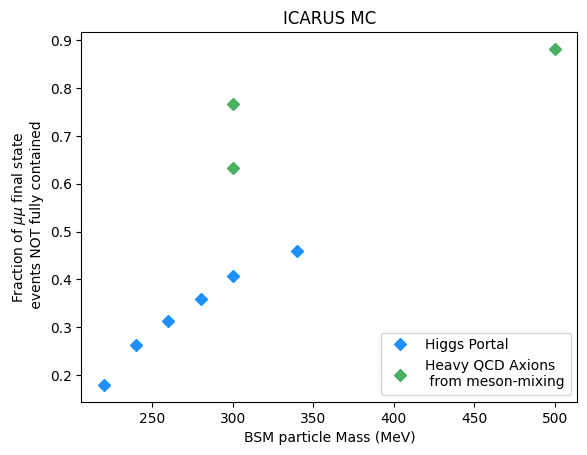

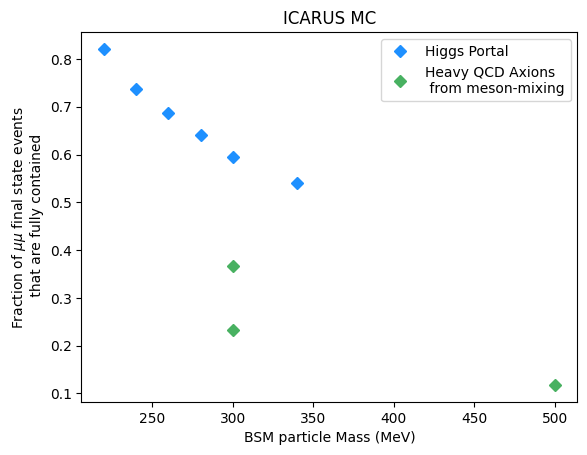

['$M_S$ = 220, $\\theta_S$ = 1e-05', '$M_S$ = 240, $\\theta_S$ = 1e-05', '$M_S$ = 260, $\\theta_S$ = 1e-05', '$M_S$ = 280, $\\theta_S$ = 1e-05', '$M_S$ = 300, $\\theta_S$ = 1e-05', '$M_S$ = 340, $\\theta_S$ = 1e-05', "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'", "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'", "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'", '$\\nu$', 'Coh-like $\\nu$']


In [9]:
# FRACTION UNCONTAINED
#plt.plot((220, 240, 260, 280, 300, 340), pc_exit[:6], 'D', color="#1E90FF", label='Higgs Portal')
#plt.plot((500), pc_exit[6], 'D', color="#48B161", label='Heavy QCD Axions \n from meson-mixing')
plt.plot(higgs_masses, pc_exit[:len(higgs_masses)], 'D', color="#1E90FF", label='Higgs Portal')
plt.plot(alp_nosup_masses, pc_exit[len(higgs_masses):len(higgs_masses)+len(alp_nosup_masses)], 'D', color="#48B161", label='Heavy QCD Axions \n from meson-mixing')
# higgs_masses + alp_nosup_masses
plt.title('ICARUS MC')
plt.ylabel('Fraction of $\\mu\\mu$ final state \n events NOT fully contained')
plt.xlabel('BSM particle Mass (MeV)')
plt.legend( loc='lower right') # 'center right'
plt.show()

# FRACTION CONTAINED
plt.plot(higgs_masses,
         np.array([1.]*len(higgs_masses))-np.array(pc_exit[:len(higgs_masses)]),
         'D', color="#1E90FF", label='Higgs Portal'
        )
plt.plot(alp_nosup_masses,
         np.array([1.]*len(alp_nosup_masses))-np.array(pc_exit[len(higgs_masses):len(higgs_masses)+len(alp_nosup_masses)]),
         'D', color="#48B161", label='Heavy QCD Axions \n from meson-mixing'
        )
plt.title('ICARUS MC')
plt.ylabel('Fraction of $\\mu\\mu$ final state events \n that are fully contained')
plt.xlabel('BSM particle Mass (MeV)')
plt.legend( loc='upper right') # 'center right'
plt.show()
print(labels)

### Pie charts (these are clunky - use the scatter plots instead)

My colors:

- scalars: blue
- ALPs: purple
- ALPs without suppression: green
- nu: orange
- cosmics: red

In [ ]:
# Make Pie Charts:
    #mylabels = ["Fully Contained \n MC: %a  (%a%%) \n " % (narray[0], pc[0]) + POTSTR + ": %a" % exp[0], 
    #            "Exiting \n MC: %a  (%a%%) \n" % (narray[1], pc[1]) + POTSTR + ": %a" % exp[1],
    #            "Semi Contained \n MC: %a  (%a%%) \n" % (narray[2], pc[2]) + POTSTR + ": %a" % exp[2]
    #           ]
    
    #if 'M_S' in c.name: mycolors = ["#87CEEB", "#00008B", "#6495ED"] # blue pallette (scalars)
    ##elif 'axion' in c.name: mycolors = ["#7FFFD4", "#2F4F4F", "#008080"] # green pallette (heavy QCD axions)
    #elif 'M_{ALP}' in c.name:
    #    if "no sup." not in c.name: mycolors = ["#D8BFD8", "#663399", "#9370DB"] # purple pallette (ALPs)
    #    else: mycolors = ["#7FFFD4", "#2F4F4F", "#008080"] # green pallette (ALPs without suppression)
        
    #elif 'nu' in c.name: mycolors = oranges #["#FFDAB9", "#A0522D", "#F4A460"] # orange pallette (nu)
    #else: mycolors = ["#CD5C5C", "#800000", "#FF6347"] # red pallette (cosmics)
    #plt.pie(narray, labels = mylabels, colors = mycolors, startangle = 90, textprops={'fontsize': 10})
    #plt.title(c.name + "\n (Fid. events per " + POTSTR + ": %a )" % event_count )
    #if dosave: plt.savefig(savedir + "containment_%a.pdf" % c.name, bbox_inches = mpl.transforms.Bbox([[-1,0], [7,5]]))
    #plt.show()

# Truth Distributions

## Check the Energy Distributions for HPS benchmarks vs. ALP benchmarks

As is (today is 11/20/23), the energy and decay length distributions are for exiting AND fully contained events. (MC dataframes are used, not evtdf, and defs not evtdf that has excluded contained events yet).

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'


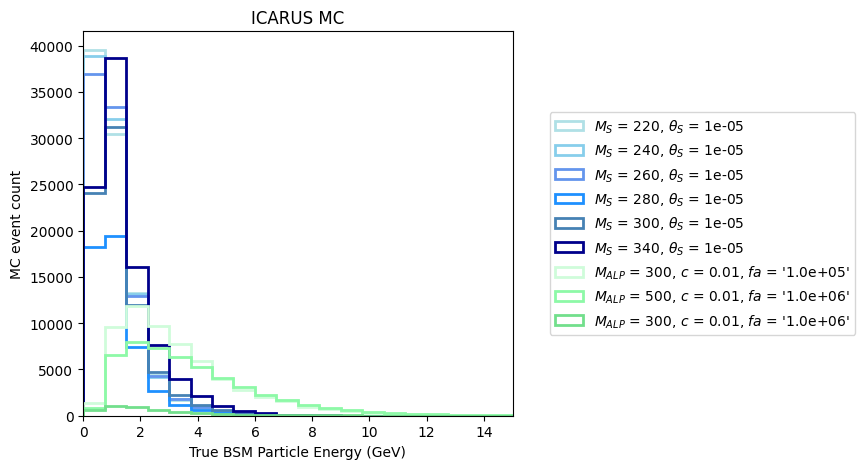

In [11]:
# NOTE:
# I do not need to worry about scaling here. The events are already deweighted. 
#    The scale factor is just for POT normalizing, but if I area normalize each dist. anyway, 
#    it doesn't matter if I scale for POT.

dosave = False
fig = plt.figure()
ax = plt.subplot(111)
scale = evtdf.scale.copy()
density=False
xrange=(0,15.) #(0,25.)
c=0
for df in higgs_mcdfs:
    print(categories[c].name)
    _ = plt.hist(df.E, bins=20, label=categories[c].name, color=categories[c].color,
                 histtype="step", linewidth=2, density=density, range=xrange) # , weights=scale[c], categories[c].name.split(',')[0]
    c = c+1
for df in alp_nosup_mcdfs:
    print(categories[c].name)
    _ = plt.hist(df.E, bins=20, label=categories[c].name, color=categories[c].color,
                 histtype="step", linewidth=2, density=density, range=xrange) # , weights=scale[c], categories[c].name.split(',')[0]
    c = c+1
plt.tight_layout()
plt.xlabel("True BSM Particle Energy (GeV)") # Total energy, not just kinetic.
plt.title("ICARUS MC")# \n All preselected events")
plt.xlim(xrange)
#plt.yscale('log')
if density:
    plt.ylabel("Area Normalized")
else:
    plt.ylabel("MC event count")
plt.tight_layout()    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc = 'center left', bbox_to_anchor=(1.07, 0.5)) 
    # first entry above sets x position of legend, with 1 being at right edge of plot.
    # second entry above sets y position of legend, with 0.5 being centered. 
if dosave: plt.savefig(savedir + "BSM_Espectrum.pdf")
plt.show()


In [12]:
# - WIP - Figure out how to plot BSM energy spectra for only the uncontained sample:

bsm_mcdf_dict = {
    0: higgs_mcdfs[0],
    1: higgs_mcdfs[1],
    2: higgs_mcdfs[2],
    3: higgs_mcdfs[3],
    4: higgs_mcdfs[4],
    5: alp_nosup_mcdfs[0],
    6: alp_nosup_mcdfs[1],
    7: alp_nosup_mcdfs[2],
    8: alp_nosup_mcdfs[3],
    9: alp_nosup_mcdfs[4],
    10: alp_nosup_mcdfs[5],
    11: alp_nosup_mcdfs[6]
}

uncontained_only = True
mc_masks = {}
if uncontained_only:
    #when_uncontained = ~TrkInFV(evtdf.trunk.trk.end) | ~TrkInFV(evtdf.branch.trk.end)
    #evtdf_unc = evtdf[when_uncontained]
    for samp in np.unique(np.array(evtdf_unc.index.get_level_values(0))):
        mcdf = bsm_mcdf_dict[samp]
        mc_masks[samp] = 
    #print(evtdf.shape)
    #print(evtdf[when_uncontained].shape)
    
#when_uncontained = ~TrkInFV(evtdf.trunk.trk.end) | ~TrkInFV(evtdf.branch.trk.end)
print(evtdf.shape)
print(evtdf[when_uncontained].shape)

SyntaxError: invalid syntax (2197674389.py, line 25)

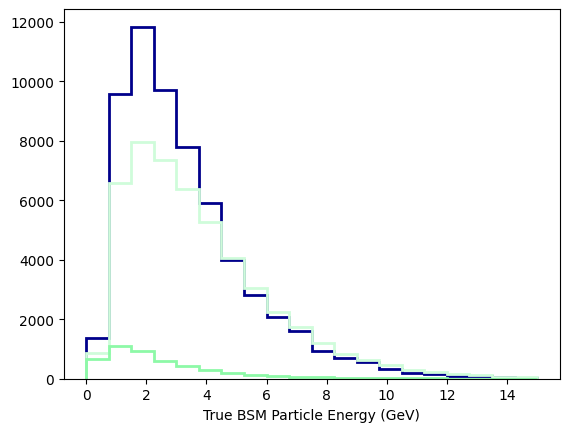

In [13]:
density = False
#for i in range(5,7):
#    plt.hist(alp_nosup_mcdfs[i].E, bins=20, label=categories[i+5].name.split(',')[0], color=oranges[i-4],
#                     histtype="step", linewidth=2, density=density, range=(0,15)) 
for i in range(len(alp_nosup_mcdfs)):#(5):
    if i==4 or i==7:
        linewidth=5
    else:
        linewidth=2
    plt.hist(alp_nosup_mcdfs[i].E, bins=20, label=categories[i+5].name.split(',')[0], color=categories[i+5].color,
                     histtype="step", linewidth=linewidth, density=density, range=(0,15)) 
#plt.hist(alp_nosup_mcdfs[4].E, bins=20, label=categories[9].name.split(',')[0], color='gold',
#                 histtype="step", linewidth=2, density=density, range=xrange) 
#plt.hist(alp_nosup_mcdfs[5].E, bins=20, label=categories[10].name.split(',')[0], color=categories[10].color,
#                 histtype="step", linewidth=2, density=density, range=xrange)
#plt.yscale('log')
#plt.legend()
plt.xlabel("True BSM Particle Energy (GeV)") # Total energy, not just kinetic.
plt.show()

#for i in range(len(alp_nosup_mcdfs)):#(5,8):
#    if i==4 | i==7:
#        linewidth=5
#    else:
#        linewidth=2
#    plt.hist(alp_nosup_mcdfs[i].E, bins=20, label=categories[i+5].name.split(',')[0], color=oranges[i-4],
#                     histtype="step", linewidth=linewidth, density=density, range=(0,15)) 
#plt.legend()
#plt.xlabel("True BSM Particle Energy (GeV)") # Total energy, not just kinetic.
#plt.show()

## Decay Lengths

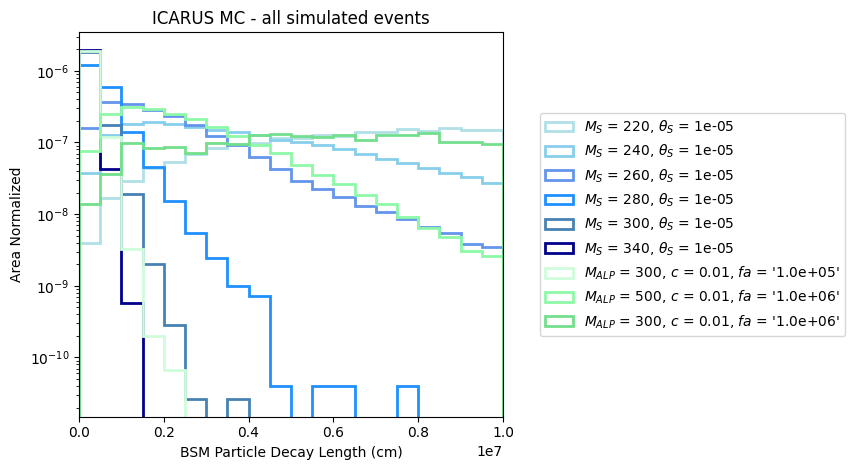

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
scale = evtdf.scale.copy()
density=True
xrange=(0, 10**7)
c=0
for df in higgs_mcdfs:
    _ = plt.hist(df.decay_length, bins=20, label=categories[c].name, color=categories[c].color,
                 histtype="step", linewidth=2, density=density, range=xrange) # , weights=scale[c], categories[c].name.split(',')[0]
    c = c+1
for df in alp_nosup_mcdfs:
    _ = plt.hist(df.decay_length, bins=20, label=categories[c].name, color=categories[c].color,
                 histtype="step", linewidth=2, density=density, range=xrange) # , weights=scale[c], categories[c].name.split(',')[0]
    c = c+1
plt.tight_layout()
plt.xlabel("BSM Particle Decay Length (cm)") # Total energy, not just kinetic.
plt.title("ICARUS MC - all simulated events")
plt.xlim(xrange)
plt.yscale('log')
#plt.xscale('log')
if density:
    plt.ylabel("Area Normalized")
else:
    plt.ylabel("Candidates / %s" % POTSTR)
plt.tight_layout()    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc = 'center left', bbox_to_anchor=(1.07, 0.5)) 
    # first entry above sets x position of legend, with 1 being at right edge of plot.
    # second entry above sets y position of legend, with 0.5 being centered. 
if dosave: plt.savefig(savedir + "BSM_decay_length.pdf")
plt.show()

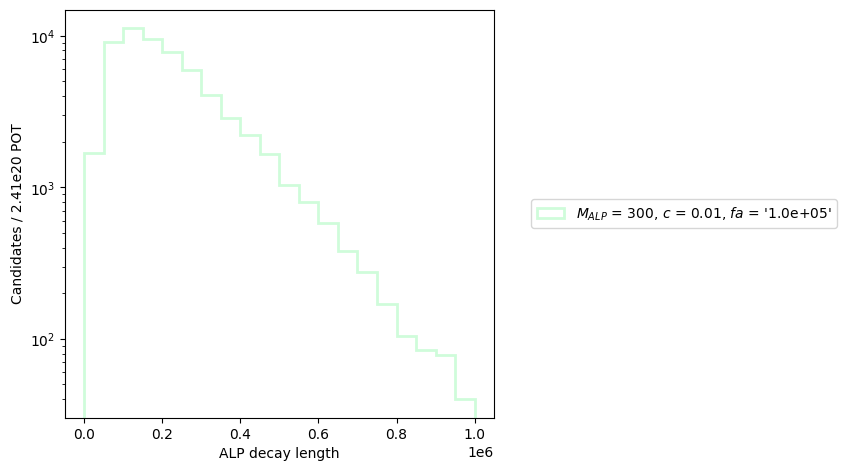

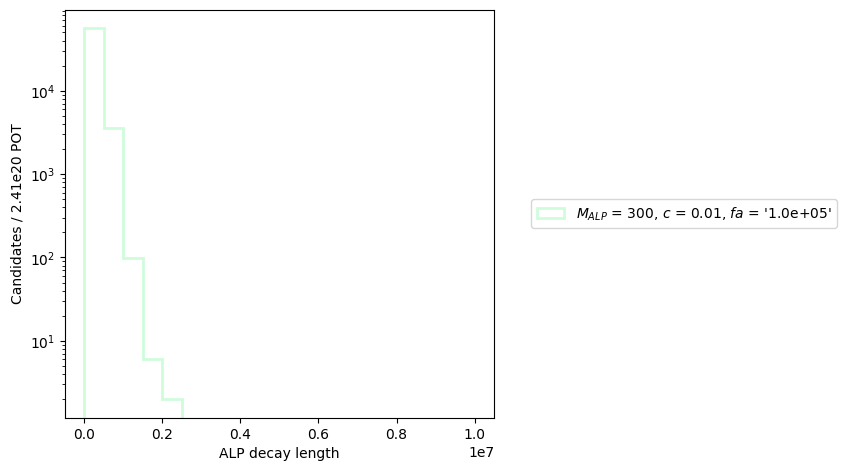

In [15]:
density = False

fig = plt.figure()
ax = plt.subplot(111)
xrange=(0, 10**6)
#for i in range(5,7):
#    plt.hist(alp_nosup_mcdfs[i].E, bins=20, label=categories[i+5].name.split(',')[0], color=oranges[i-4],
#                     histtype="step", linewidth=2, density=density, range=(0,15)) 
for i in range(1):
    plt.hist(alp_nosup_mcdfs[i].decay_length, bins=20, label=categories[i+6].name, color=categories[i+6].color,
                     histtype="step", linewidth=2, density=density, range=xrange) 
#plt.hist(alp_nosup_mcdfs[4].E, bins=20, label=categories[9].name.split(',')[0], color='gold',
#                 histtype="step", linewidth=2, density=density, range=xrange) 
#plt.hist(alp_nosup_mcdfs[5].E, bins=20, label=categories[10].name.split(',')[0], color=categories[10].color,
#                 histtype="step", linewidth=2, density=density, range=xrange)
if density:
    plt.ylabel("Area Normalized")
else:
    plt.ylabel("Candidates / %s" % POTSTR)
plt.tight_layout()
plt.yscale('log')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc = 'center left', bbox_to_anchor=(1.07, 0.5)) 
#plt.legend()
plt.xlabel('ALP decay length')
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
xrange=(0, 10**7)
for i in range(1):
    plt.hist(alp_nosup_mcdfs[i].decay_length, bins=20, label=categories[i+6].name, color=categories[i+6].color,
                     histtype="step", linewidth=2, density=density, range=xrange) 
if density:
    plt.ylabel("Area Normalized")
else:
    plt.ylabel("Candidates / %s" % POTSTR)
plt.tight_layout()
plt.yscale('log')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc = 'center left', bbox_to_anchor=(1.07, 0.5)) 
#plt.legend()
plt.xlabel('ALP decay length')
plt.show()

# -- end of Truth Studies --

## Fiducialization and Containment
Studied upon realization Summer 2024 that FV definition has changed since the dataframes currently being used were made, resulting in a mismatch between what tracks were accepted for the dataframes and which SHOULD have been accepting according to the updated FV definition.

In [31]:
def in_bad_region(df):
    bad_WW = (df.x > 210.29) & (df.x < 358.49) & (df.y > 70) & (df.z > 0) # cable
    bad_EE = (df.x > -358.49) & (df.x < -210.29) & ((df.y > 115) | (df.y < -161.86)) # field cage
    return bad_WW | bad_EE
def in_new_extra_zfront_buffer(df):
    zmin = -894.950652270838
    return (df.z > zmin+10 ) & (df.z < zmin+15)
def in_new_nonFiducial_zones(df):
    return in_new_extra_zfront_buffer(df) | in_bad_region(df)
def new_inFV(df):
    return ~in_new_nonFiducial_zones(df)
def satisfies_new_FV(df): # df should be evtdf
    return ( 
        SlcInFV(df.slc.vertex) & 
        ( (TrkInFV(df.trunk.trk.end)) | (df.trunk.trk.len >= 100)) & 
        ( (TrkInFV(df.branch.trk.end)) | (df.branch.trk.len >= 100)) 
    ) # each track is either contained, or long enought to be uncontained but still kept.

In [ ]:
# print some numbers of what's contained:

when = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.trunk.trk.end) & TrkInFV(evtdf.branch.trk.end)
unc_trunk_evtdf = evtdf[when]
print('Uncontained trunk (only): ', unc_trunk_evtdf.shape)

when = SlcInFV(evtdf.slc.vertex) & TrkInFV(evtdf.trunk.trk.end) & ~TrkInFV(evtdf.branch.trk.end)
unc_branch_evtdf = evtdf[when]
print('Uncontained branch (only): ', unc_branch_evtdf.shape)

when = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.trunk.trk.end) & ~TrkInFV(evtdf.branch.trk.end)
unc_both_evtdf = evtdf[when]
print('Both uncontained: ', unc_both_evtdf.shape)

#unc_h_evtdf = sample_concat(h_evtdf, nu_evtdf, offset=1_000_000)
unc_evtdf = unc_trunk_evtdf.append(unc_branch_evtdf).append(unc_both_evtdf)
print('Anything not contained: ', unc_evtdf.shape)

when = SlcInFV(evtdf.slc.vertex) & TrkInFV(evtdf.trunk.trk.end) & TrkInFV(evtdf.branch.trk.end)
con_evtdf = evtdf[when]
print('Totally contained: ', con_evtdf.shape)

#when = SlcInFV(h_evtdf.slc.vertex)
#print('All the Higgs Events with contained vertex: ', h_evtdf[when].shape)
print('All the Higgs Events with contained vertex: ', evtdf.shape)

In [25]:
# Note: The following are not necessarily orthogonal samples.

when_trunk_con = SlcInFV(evtdf.slc.vertex) & TrkInFV(evtdf.trunk.trk.end) 
when_trunk_unc = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.trunk.trk.end)
when_branch_con = SlcInFV(evtdf.slc.vertex) & TrkInFV(evtdf.branch.trk.end)
when_branch_unc = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.branch.trk.end)


In [ ]:
# Track end points

plt.hist(evtdf[when_trunk_unc].trunk.trk.len, mybins, range=(0,100), density=True)
plt.show()
plt.hist(evtdf[when_branch_unc].branch.trk.len, mybins, range=(0,100), density=True)
plt.show()

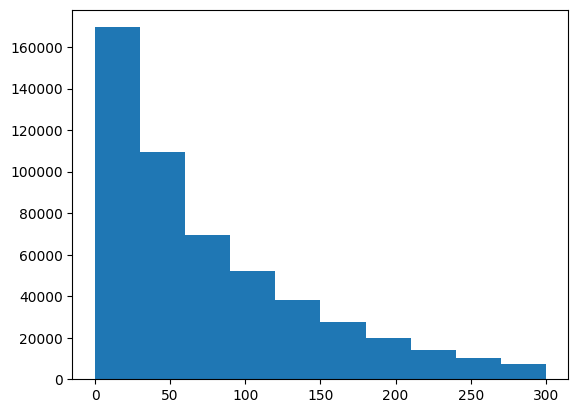

In [16]:
# Track lengths

plt.hist(evtdf[when_trunk_con].trunk.trk.len, range=(0,300))
plt.show()

## Check the Tracks' Particle ID Xi^2 Values
Gray's Definitions for Muon/Proton separation:
```python
def is_muon(trk):
    return (TrkInFV(trk.end) & (trk.chi2pid.I2.chi2_muon < 40) & (trk.chi2pid.I2.chi2_proton > 80)) | (~TrkInFV(trk.end) & (trk.len > 100.))

def is_proton(trk):
    return TrkInFV(trk.end) & (trk.chi2pid.I2.chi2_muon > 40) & (trk.chi2pid.I2.chi2_proton < 60)
```

82.93647
13811.68


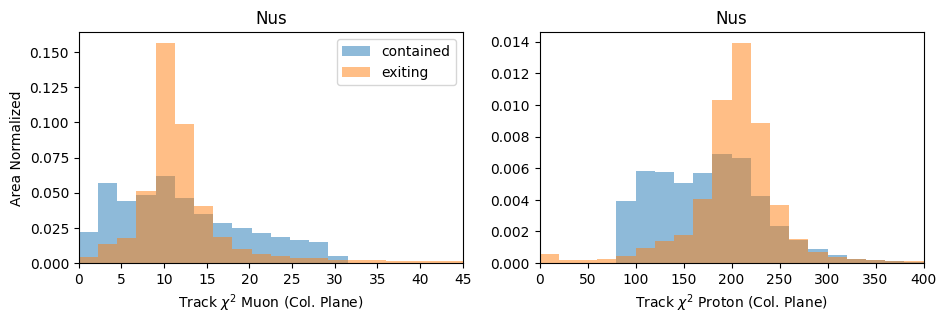

In [22]:
# Jamie 11.20.23 Put them side by side.

cats = make_categories(evtdf)
#df = cats[0]
df = evtdf[cats[1]]
#df = evtdf

when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)

plt.figure(figsize=(10.9,3))
mybins = 20
myDensity = True

# Muon x2

plt.subplot(1,2,1)
myrange = (0,45)
print(np.max(df.trunk.trk.chi2pid.I2.chi2_muon))
plt.hist(np.concatenate((df[when_branch_con].branch.trk.chi2pid.I2.chi2_muon,
                        df[when_trunk_con].trunk.trk.chi2pid.I2.chi2_muon)), 
         label='contained', bins=mybins, range=myrange, linewidth=2, density=myDensity, alpha=0.5)
plt.hist(np.concatenate((df[when_trunk_unc].trunk.trk.chi2pid.I2.chi2_muon, 
                         df[when_branch_unc].branch.trk.chi2pid.I2.chi2_muon)), 
         label='exiting', bins=mybins, range=myrange, linewidth=2, density=myDensity, alpha=0.5)
#plt.axvline([30], linestyle=":", color="red", linewidth=2)
plt.xlim(myrange)
plt.legend(loc='upper right')
plt.xlabel("Track $\\chi^2$ Muon (Col. Plane)")
#plt.ticklabel_format(self, *, axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
if myDensity == True:
    plt.ylabel("Area Normalized")
else:
    plt.ylabel("# of tracks")
#plt.title('All Events (BSM, nu, and Cosmics)')
plt.title('Nus')

# Proton x2

plt.subplot(1,2,2)
myrange = (0,400)
print(np.max(df.trunk.trk.chi2pid.I2.chi2_proton))
plt.hist(np.concatenate((df[when_branch_con].branch.trk.chi2pid.I2.chi2_proton,
                        df[when_trunk_con].trunk.trk.chi2pid.I2.chi2_proton)), label='contained',
         bins=mybins, range=myrange, linewidth=2, density=myDensity, alpha=0.5)
plt.hist(np.concatenate((df[when_trunk_unc].trunk.trk.chi2pid.I2.chi2_proton, 
                         df[when_branch_unc].branch.trk.chi2pid.I2.chi2_proton)), label='exiting',
         bins=mybins, range=myrange, linewidth=2, density=myDensity, alpha=0.5)
#plt.axvline([100], linestyle=":", color="red", linewidth=2)
plt.xlim(myrange)
#plt.legend()
plt.xlabel("Track $\\chi^2$ Proton (Col. Plane)")
#if myDensity == True:
#    plt.ylabel("Area Normalized")
#else:
#    plt.ylabel("# of tracks")
###    
#plt.title('All Events (BSM, nu, and Cosmics)')
plt.title('Nus')
plt.show()


My interpretation of above plots:
    
It looks like the xi2 thresholds used for the contained tracks will also work for the uncontained tracks (at least looking at these signal-only distributions).

In [23]:
print(np.unique(evtdf.trunk.trk.truth.p.pdg))
print(np.unique(evtdf.branch.trk.truth.p.pdg))

[-2147483648       -2212        -321        -211         -13         -11
          11          13          22         211         321        2112
        2212        3112        3222  1000010020  1000010030  1000020030
  1000020040  1000120230  1000120240  1000140280  1000140290  1000140300
  1000150310  1000150320  1000160350  1000160360]
[-2147483648       -2212        -321        -211         -13         -11
          11          13          22         211         321        2112
        2212        3112        3122        3222  1000010020  1000010030
  1000010040  1000020030  1000020040  1000030060  1000050110  1000090180
  1000100210  1000110230  1000120260  1000130270  1000140280  1000140290
  1000140300  1000150310  1000150320  1000150330  1000160320  1000160330
  1000160340  1000170360  1000170370]


## Check the Tracks' Lengths

### Note: Upstream, when the dataframes for the samples were made, a ( track length >= 100 cm ) requirement was imposed for uncontained tracks.

How long of a length do you need to require to get down to zero background?

32235.408


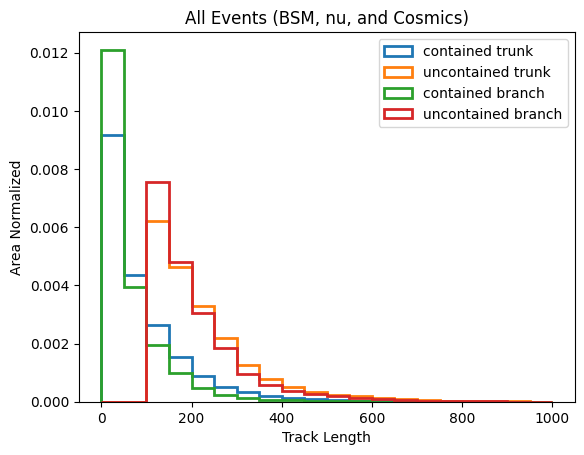

In [26]:
# All tracks in same plot:

mybins = 20
myrange = (0,1000)
myDensity = True
print(np.max(evtdf.trunk.trk.len)) 
plt.hist(evtdf[when_trunk_con].trunk.trk.len, histtype = 'step', 
         label='contained trunk', bins=mybins, range=myrange, linewidth=2, density=myDensity)
plt.hist(evtdf[when_trunk_unc].trunk.trk.len, histtype = 'step', 
         label='uncontained trunk', bins=mybins, range=myrange, linewidth=2, density=myDensity)
plt.hist(evtdf[when_branch_con].branch.trk.len, histtype = 'step', 
         label='contained branch', bins=mybins, range=myrange, linewidth=2, density=myDensity)
plt.hist(evtdf[when_branch_unc].branch.trk.len, histtype = 'step', 
         label='uncontained branch', bins=mybins, range=myrange, linewidth=2, density=myDensity)
plt.legend()
plt.xlabel("Track Length")
if myDensity == True:
    plt.ylabel("Area Normalized")
plt.title('All Events (BSM, nu, and Cosmics)')
plt.show()

In [27]:
### Check track lengths directly:

def uncontained_trk_lens(df, myDensity=True, title='which sample?', dosave=False, plotname='ForgotName'):

    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    
    plt.figure(figsize=(10.9,3))
    mybins = 30

    # trunks  

    myrange=(0,300)
    plt.subplot(1,2,1)
    plt.hist(df[when_trunk_unc].trunk.trk.len, mybins, range=myrange, density=myDensity)
       
        #plt.hist(var, alpha=0.5, color=colors[i], label=labels[i], 
        #         bins=mybins, range=myrange, linewidth=2, density=myDensity
        #        )
    #plt.yscale('log')
    plt.xlabel("length of uncontained trunk tracks (cm)")
    plt.xlim(myrange)
    plt.title(title)
    if myDensity == True:
        plt.ylabel("Area Normalized")

    # branches

    myrange=(0,300)
    plt.subplot(1,2,2)
    plt.hist(df[when_branch_unc].branch.trk.len, mybins, range=myrange, density=myDensity)
    #plt.yscale('log')
    plt.xlabel("length of uncontained branch tracks (cm)")
    plt.xlim(myrange)
    plt.title(title)
    if myDensity == True:
        plt.ylabel("Area Normalized")
    
    
    #if dosave: plt.savefig(plotdir+plotname+'.png', format='png', bbox_inches='tight')
    plt.show()
###

In [28]:
print(min( np.concatenate(( evtdf.branch.trk.end.x, evtdf.trunk.trk.end.x )) ))
print(max( np.concatenate(( evtdf.branch.trk.end.x, evtdf.trunk.trk.end.x )) ))
print('')
print(min( np.concatenate(( evtdf.branch.trk.end.y, evtdf.trunk.trk.end.y )) ))
print(max( np.concatenate(( evtdf.branch.trk.end.y, evtdf.trunk.trk.end.y )) ))
print('')
print(min( np.concatenate(( evtdf.branch.trk.end.z, evtdf.trunk.trk.end.z )) ))
print(max( np.concatenate(( evtdf.branch.trk.end.z, evtdf.trunk.trk.end.z )) ))
print('')
print(evtdf.branch.trk.end.shape)
print(evtdf[TrkInFV(evtdf.branch.trk.end)].shape)

-376.5124
366.3108

-824.24945
978.04047

-1036.4823
1029.8354

(888306, 3)
(680582, 279)


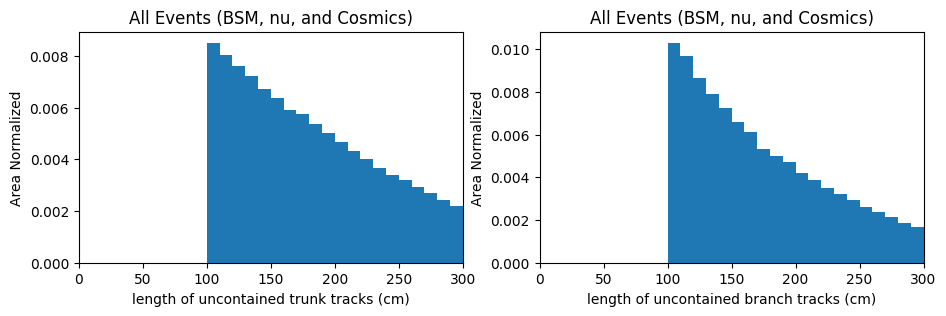

In [29]:
uncontained_trk_lens(evtdf, title='All Events (BSM, nu, and Cosmics)')

#cats = make_categories(evtdf, detailed_bsm=True)
#for c in cats:
#    uncontained_trk_lens(evtdf[c], title=c.name)#+"\n ~ After Jamie's changes to makedf.py ~")
    
#uncontained_trk_lens(evtdf[cats[-3]], title=cats[-3].name)#+"\n ~ After Jamie's changes to makedf.py ~")

Update: Yep, the below guess was correct. I've fixed it now by reinforcing the correct FV definition to the dataframes within the unc_samples.py script. If or when I eventually remake dataframes, it will automatically be correct there since it will use the updated FV definition to do that.

-----------------
Maybe the tracks in the tails are due to a change in FV volume, and at the time of applying the preselection the FV definition was such that those tracks were considered contained and therefor did not need to be at least 1m?

See commit history: https://github.com/SBNSoftware/sbnana/commit/ff5bde162507b048ad69763c0c9c2c454a542d38#diff-4e4838bb7dd4a438ff91baeec0e29f56514820f5f7f6434380f15e9fe2b012a0 

Check:

In [32]:
when_trunk_unc = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.trunk.trk.end)
when_branch_unc = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.branch.trk.end)

when_trunk_unc_tail = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.trunk.trk.end) & (evtdf.trunk.trk.len < 100.)
when_branch_unc_tail = SlcInFV(evtdf.slc.vertex) & ~TrkInFV(evtdf.branch.trk.end) & (evtdf.branch.trk.len < 100.)

trunk_tail_df = evtdf[when_trunk_unc_tail]
print("shape of trunks in bad tail: ", trunk_tail_df.shape)
print("shape of trunks in bad tail that also have endpoints in bad regions: ", trunk_tail_df[in_bad_region(trunk_tail_df.trunk.trk.end)].shape)
print("shape of trunks in bad tail explained by FV commit: ", trunk_tail_df[ in_new_nonFiducial_zones(trunk_tail_df.trunk.trk.end) ].shape)
print("")
branch_tail_df = evtdf[when_branch_unc_tail]
print("shape of branches in bad tail: ", branch_tail_df.shape)
print("shape of branches in bad tail that also have endpoints in bad regions: ", branch_tail_df[ in_bad_region(branch_tail_df.branch.trk.end)].shape)
print("shape of branches in bad tail explained by FV commit: ", branch_tail_df[ in_new_nonFiducial_zones(branch_tail_df.branch.trk.end)].shape)


shape of trunks in bad tail:  (0, 279)
shape of trunks in bad tail that also have endpoints in bad regions:  (0, 279)
shape of trunks in bad tail explained by FV commit:  (0, 279)

shape of branches in bad tail:  (0, 279)
shape of branches in bad tail that also have endpoints in bad regions:  (0, 279)
shape of branches in bad tail explained by FV commit:  (0, 279)


In [33]:
# Sanity check: make sure all tracks are at least 10 cm
print(min(evtdf.trunk.trk.len))
print(min(evtdf.branch.trk.len))
# Good.

10.000082015991211
10.000099182128906


## 2D phi_NuMI vs. theta_NuMI

<Figure size 1090x300 with 0 Axes>

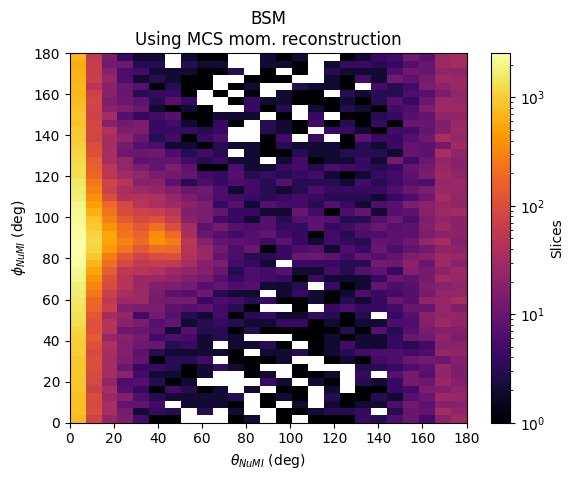

<Figure size 1090x300 with 0 Axes>

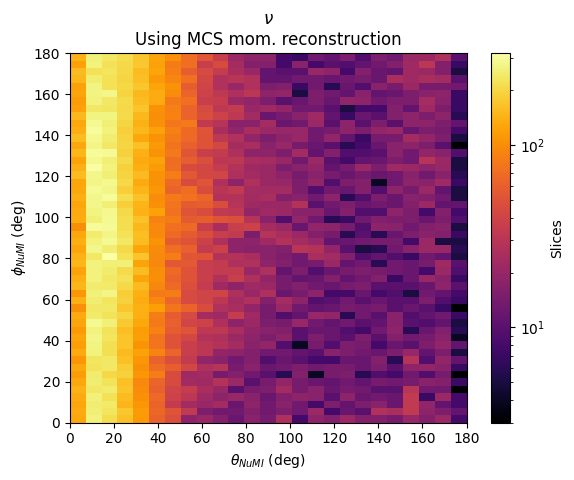

<Figure size 1090x300 with 0 Axes>

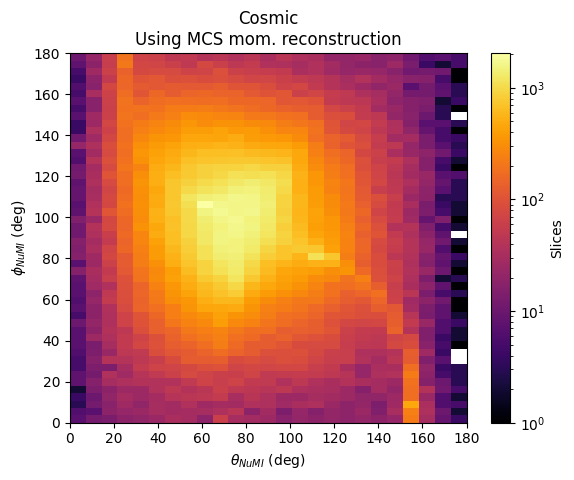

In [37]:
categories = make_categories(evtdf)
for c, cat in enumerate(categories):
    #if c==1: 
    #    title = 'Using MCS mom. reconstruction'
    #    df = evtdf
    #else: 
    #    title = cat.name + '\nUsing MCS mom. reconstruction'
    #    df = evtdf[cat]
    title = cat.name + '\nUsing MCS mom. reconstruction'
    df = evtdf[cat]
    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    
    ybins = 50
    plt.figure(figsize=(10.9,3))

    xvar = df["Snumi_angle_mcs"]*180/math.pi
    yvar = df["phi_NuMI_mcs"]*180/math.pi

    fig, ax = plt.subplots(ncols=1)
    hb, xedges, yedges, im = ax.hist2d(xvar, yvar, bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                   cmin=1, cmap='inferno', range=((0,180),(0,180)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('$\\theta_{NuMI}$ (deg)')
    plt.ylabel('$\\phi_{NuMI}$ (deg)')
    plt.title(title)
    plt.show()
    plt.close()

## Compare True and Reco Momenta

-1.0
7.5


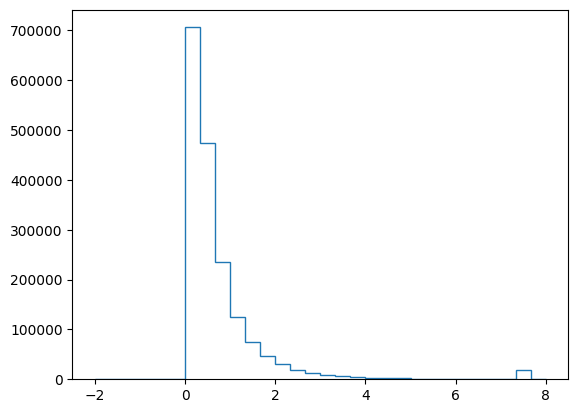

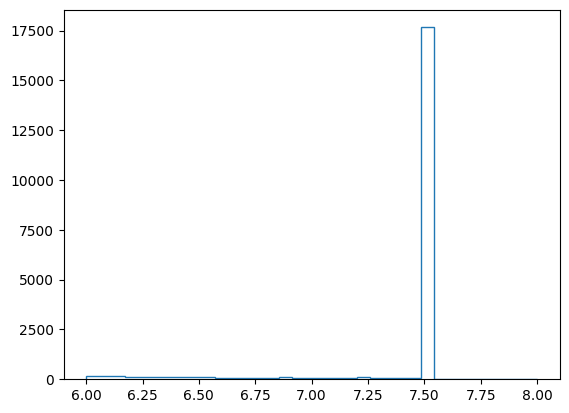

(1776612,)
(188,)
(0,)
(69029,)
(17659,)



In [39]:
# Plot histogram of p_MCS to help spot non-physical values:

#for c in evtdf.columns:
#    print(c)
var = np.concatenate((evtdf.branch.trk.mcsP.fwdP_muon, evtdf.trunk.trk.mcsP.fwdP_muon))
print(min(var))
print(max(var))
plt.hist(var, bins = 30, histtype='step', range=(-2,8))
plt.show()

plt.hist(var, bins = 35, histtype='step', range=(6,8))
plt.show()

print(var.shape)

mask_minus1 = var==-1.0
print(var[mask_minus1].shape)

mask_zero = var==0.0
print(var[mask_zero].shape)

mask_weird = var==0.01
print(var[mask_weird].shape)

mask_sevenptfive = var==7.5
print(var[mask_sevenptfive].shape)

print()

In [40]:
# PLOT RECO - TRUE FOR RANGE-BASED AND MCS
# contained and exiting will be side by side

#savedir = "/exp/icarus/data/users/jdyer/muon_selection/"
#plotdir = savedir+'plots/'

def reco_p_comparison(df, myDensity=True, title='which sample?', dosave=False, 
                      plotname='ForgotName'):

    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) & abs(df.trunk.trk.truth.p.pdg == 13)
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end) & abs(df.trunk.trk.truth.p.pdg == 13)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end) & abs(df.branch.trk.truth.p.pdg == 13)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end) & abs(df.branch.trk.truth.p.pdg == 13)
    
    con_range = np.concatenate((
        (getp(df[when_trunk_con].trunk.trk, 'range') - 
         getp(df[when_trunk_con].trunk.trk, 'track_truth')), 
        (getp(df[when_branch_con].branch.trk, 'range') - 
         getp(df[when_branch_con].branch.trk, 'track_truth'))
    ))
    #print(np.max(np.abs(con_range)))

    con_mcs = np.concatenate((
        (getp(df[when_trunk_con].trunk.trk, 'mcs') - 
         getp(df[when_trunk_con].trunk.trk, 'track_truth')), 
        (getp(df[when_branch_con].branch.trk, 'mcs') - 
         getp(df[when_branch_con].branch.trk, 'track_truth'))
    ))   
    #print(np.max(np.abs(con_mcs)))

    unc_range = np.concatenate((
        (getp(df[when_trunk_unc].trunk.trk, 'range') - 
         getp(df[when_trunk_unc].trunk.trk, 'track_truth')), 
        (getp(df[when_branch_unc].branch.trk, 'range') - 
         getp(df[when_branch_unc].branch.trk, 'track_truth')) 
    ))
    #print(np.max(np.abs(unc_range)))

    unc_mcs = np.concatenate((
        (getp(df[when_trunk_unc].trunk.trk, 'mcs') - 
         getp(df[when_trunk_unc].trunk.trk, 'track_truth')), 
        (getp(df[when_branch_unc].branch.trk, 'mcs') - 
         getp(df[when_branch_unc].branch.trk, 'track_truth')) 
    ))
    
    plt.figure(figsize=(10.9,3))
    mybins = 30
    methods = ['range', 'mcs']
    labels = ['range-based', 'MCS']
    colors = ['C0', 'C1']


    # Contained  

    myrange=(-1,1)
    plt.subplot(1,2,1)
    for i in range(len(methods)):
        var = np.concatenate((
            (getp(df[when_trunk_con].trunk.trk, methods[i]) - 
             getp(df[when_trunk_con].trunk.trk, 'track_truth'))/getp(df[when_trunk_con].trunk.trk, 'track_truth'), 
            (getp(df[when_branch_con].branch.trk, methods[i]) - 
             getp(df[when_branch_con].branch.trk, 'track_truth'))/getp(df[when_branch_con].branch.trk, 'track_truth') 
        ))
        #weights = np.concatenate((
        
        #))
        print(np.max(np.abs(var)))
        out_of_range = [( (el < myrange[0]) | (el > myrange[1]) ) for el in var]
        print('Out of range values: %a / %a (=%a %%)' % 
              (var[out_of_range].shape[0], var.shape[0], 100.*var[out_of_range].shape[0]/var.shape[0]) )
        plt.hist(var, alpha=0.5, color=colors[i], label=labels[i], 
                 bins=mybins, range=myrange, linewidth=2, density=myDensity
                )
    #plt.yscale('log')
    plt.legend(ncol=1, loc='upper left')
    plt.xlabel("$(p_{reco} - p_{true})/p_{true}$")
    plt.xlim(myrange)
    plt.title(title+'\n Selected Contained Tracks \nTruth-matched to a $\mu$') # (≥10cm)')
    if myDensity == True:
        plt.ylabel("Area Normalized")

    # Exiting

    #myrange=(-1,2)
    plt.subplot(1,2,2)
    for i in range(len(methods)):
        var = np.concatenate((
            (getp(df[when_trunk_unc].trunk.trk, methods[i]) - 
             getp(df[when_trunk_unc].trunk.trk, 'track_truth'))/getp(df[when_trunk_unc].trunk.trk, 'track_truth'), 
            (getp(df[when_branch_unc].branch.trk, methods[i]) - 
             getp(df[when_branch_unc].branch.trk, 'track_truth'))/getp(df[when_branch_unc].branch.trk, 'track_truth')
        ))
        print(np.max(np.abs(var)))
        out_of_range = [( (el < myrange[0]) | (el > myrange[1]) ) for el in var]
        print('Out of range values: %a / %a (=%a %%)' % 
              (var[out_of_range].shape[0], var.shape[0], 100.*var[out_of_range].shape[0]/var.shape[0]) )
        plt.hist(var, alpha=0.5, color=colors[i], label=labels[i],
                 bins=mybins, range=myrange, linewidth=2, density=myDensity
                )
    #plt.yscale('log')
    plt.legend(ncol=1, loc='upper left')
    plt.xlabel("$(p_{reco} - p_{true})/p_{true}$")
    plt.xlim(myrange)
    plt.title(title+'\n Selected Exiting Tracks \nTruth-matched to a $\mu$')# ≥ 1m')
    #if myDensity == True:
    #    plt.ylabel("Area Normalized")
    if dosave: plt.savefig(plotdir+plotname+'.png', format='png', bbox_inches='tight')
    plt.show()
###



No non-physical MCS values included, and only plot for tracks that have muon PDGs (implemented this in masks in function):
$M_S$ = 220, $\theta_S$ = 1e-05
1.6123973
Out of range values: 7 / 12342 (=0.05671690163668773 %)
35.56007
Out of range values: 587 / 12342 (=4.756117322962242 %)
0.99317276
Out of range values: 0 / 1757 (=0.0 %)
2.5724277
Out of range values: 8 / 1757 (=0.4553215708594195 %)


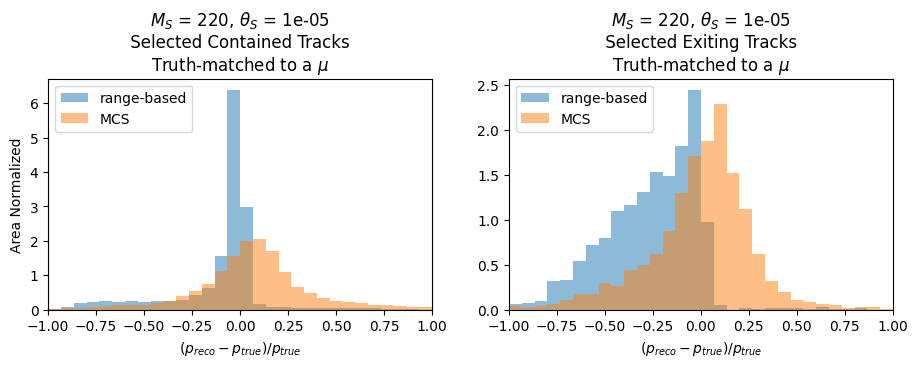

$M_S$ = 240, $\theta_S$ = 1e-05
2.0161576
Out of range values: 121 / 17266 (=0.7007992586586355 %)
37.328575
Out of range values: 781 / 17266 (=4.52334066952392 %)
1.7404108
Out of range values: 12 / 3769 (=0.3183868400106129 %)
3.3068497
Out of range values: 12 / 3769 (=0.3183868400106129 %)


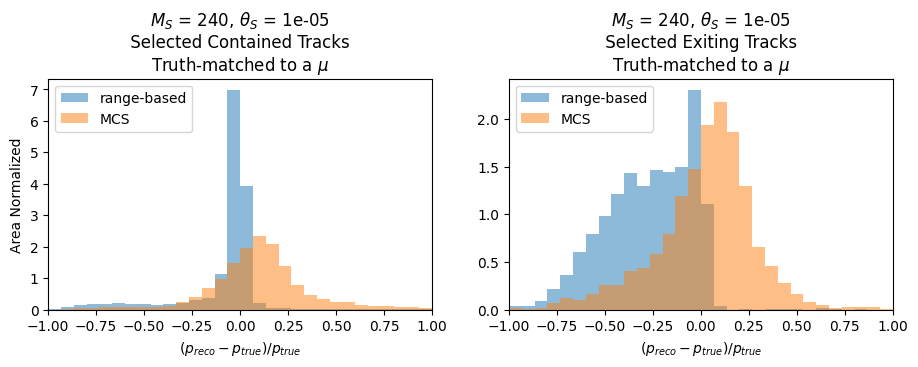

$M_S$ = 260, $\theta_S$ = 1e-05
7.02276
Out of range values: 70 / 18607 (=0.37620250443381525 %)
22.21335
Out of range values: 758 / 18607 (=4.073735690869028 %)
1.6398376
Out of range values: 6 / 4871 (=0.12317799219872716 %)
7.325329
Out of range values: 25 / 4871 (=0.5132416341613631 %)


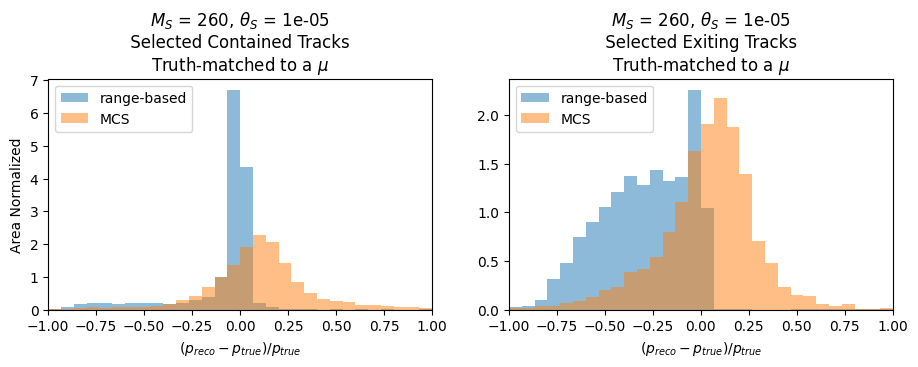

$M_S$ = 280, $\theta_S$ = 1e-05
2.126305
Out of range values: 12 / 10293 (=0.11658408627222384 %)
24.026741
Out of range values: 435 / 10293 (=4.2261731273681145 %)
2.2848213
Out of range values: 5 / 3147 (=0.15888147442008263 %)
10.818211
Out of range values: 16 / 3147 (=0.5084207181442644 %)


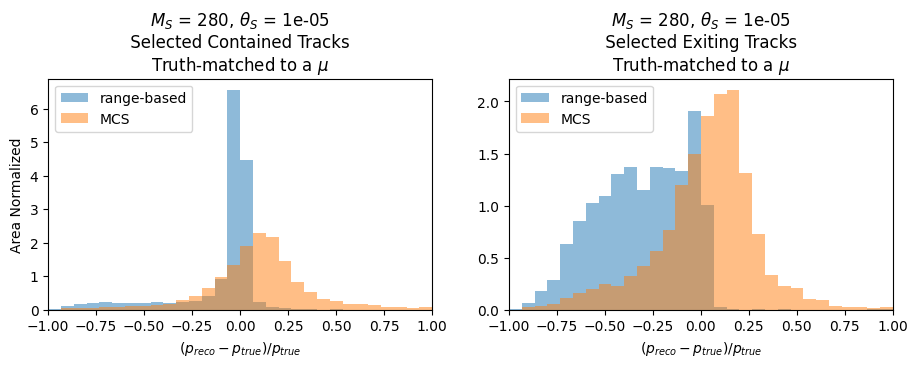

$M_S$ = 300, $\theta_S$ = 1e-05
2.4557145
Out of range values: 15 / 15334 (=0.0978218338333116 %)
21.006992
Out of range values: 573 / 15334 (=3.736794052432503 %)
1.4920064
Out of range values: 1 / 5474 (=0.018268176835951774 %)
11.757132
Out of range values: 26 / 5474 (=0.4749725977347461 %)


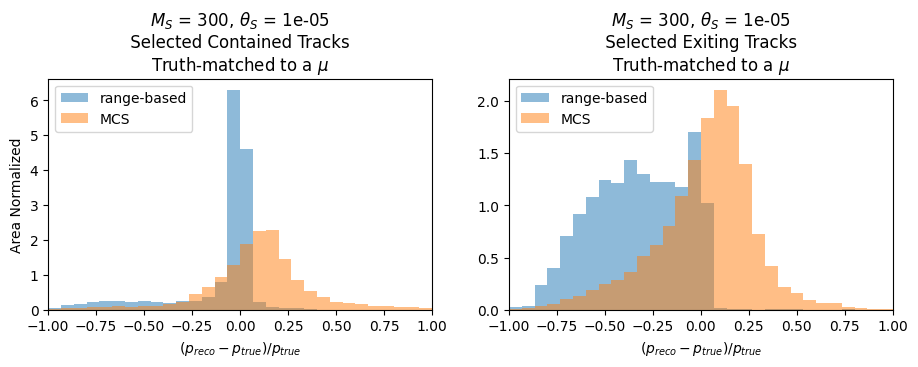

$M_S$ = 340, $\theta_S$ = 1e-05
2.2455761
Out of range values: 8 / 18478 (=0.043294728866760473 %)
19.348501
Out of range values: 672 / 18478 (=3.6367572248078797 %)
1.4724071
Out of range values: 1 / 7932 (=0.012607160867372668 %)
5.4085217
Out of range values: 42 / 7932 (=0.529500756429652 %)


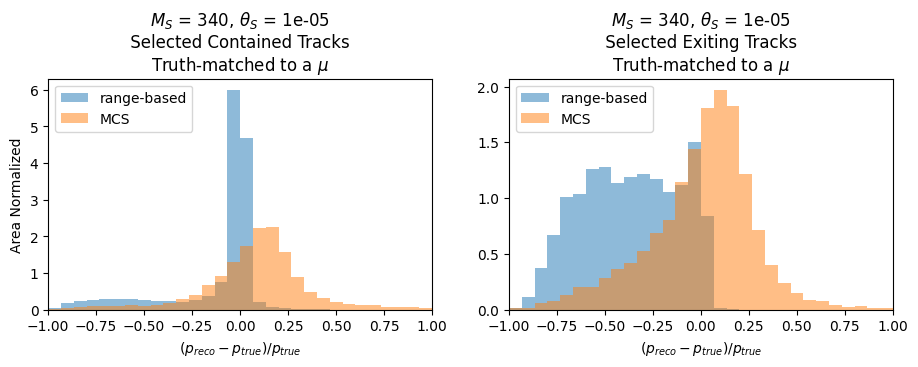

$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
1.186374
Out of range values: 1 / 6945 (=0.014398848092152628 %)
10.677407
Out of range values: 85 / 6945 (=1.2239020878329734 %)
1.055135
Out of range values: 1 / 8973 (=0.011144544745347153 %)
2.5619714
Out of range values: 20 / 8973 (=0.22289089490694305 %)


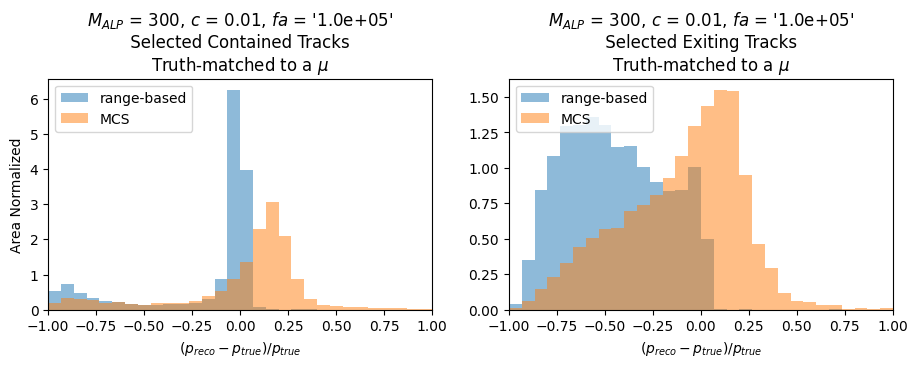

$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
3.3157997
Out of range values: 2 / 5887 (=0.033973161202649906 %)
20.514523
Out of range values: 140 / 5887 (=2.3781212841854935 %)
0.99167264
Out of range values: 0 / 10661 (=0.0 %)
5.7986856
Out of range values: 36 / 10661 (=0.3376793921770941 %)


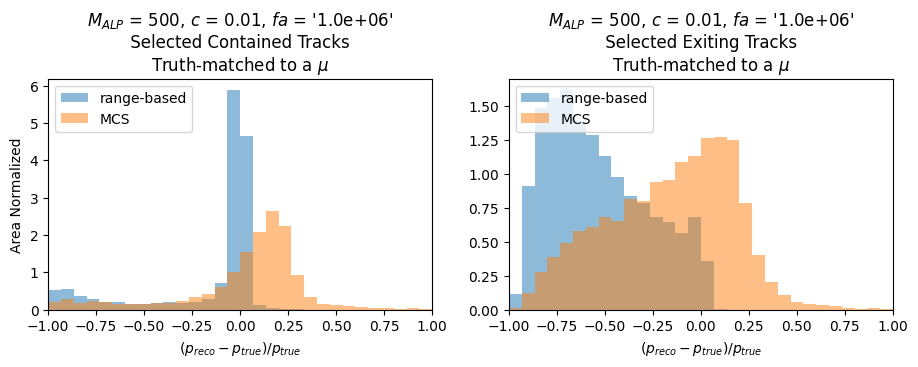

$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
0.9660338
Out of range values: 0 / 719 (=0.0 %)
19.583183
Out of range values: 17 / 719 (=2.364394993045897 %)
0.9301571
Out of range values: 0 / 582 (=0.0 %)
1.0877573
Out of range values: 2 / 582 (=0.3436426116838488 %)


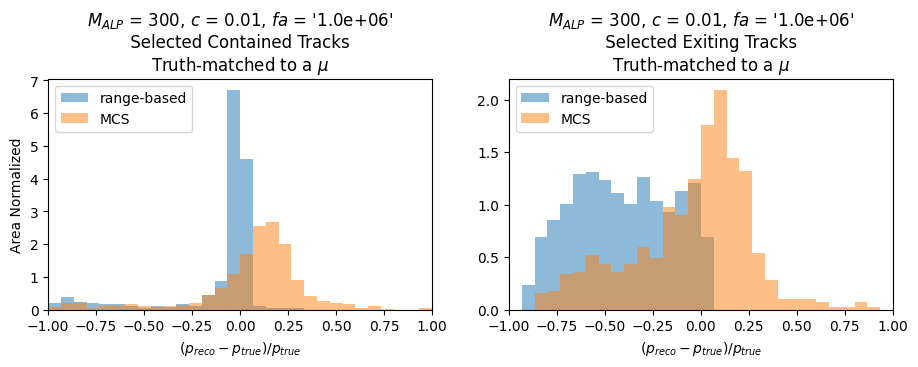

$\nu$
4.8466907
Out of range values: 23 / 41905 (=0.054886051783796685 %)
22.140451
Out of range values: 1172 / 41905 (=2.7968022908960744 %)
13.095419
Out of range values: 5 / 46779 (=0.010688556831056671 %)
6.8388405
Out of range values: 158 / 46779 (=0.3377583958613908 %)


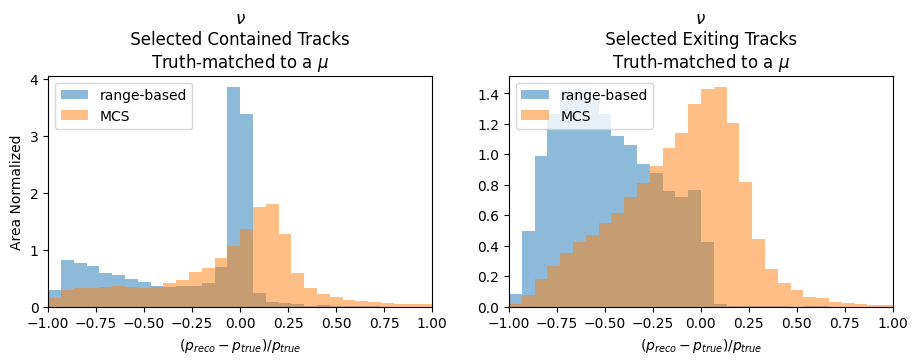

Cosmic
1.3355192
Out of range values: 3 / 133489 (=0.0022473761883001595 %)
9.132795
Out of range values: 132 / 133489 (=0.09888455228520703 %)
2.7382238
Out of range values: 6 / 89799 (=0.0066815888818361 %)
2.8302984
Out of range values: 14 / 89799 (=0.015590374057617568 %)


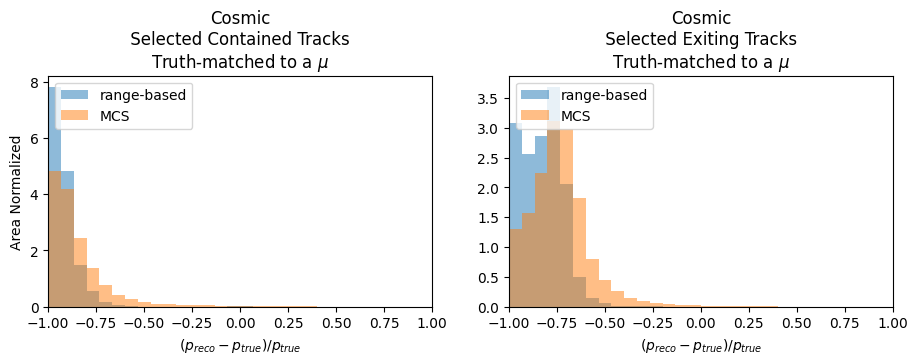

In [42]:
#reco_p_comparison(evtdf, title='BSM + cosmics')

#cats = make_categories(evtdf)
#for c in cats:
#    df = evtdf[c]
#    reco_p_comparison(df, title=c.name, dosave=True, plotname='mcs_vs_range')
    
#reco_p_comparison(evtdf, title='BSM + cosmics')

# Re-do, with flagged MCS values masked out:

print('No non-physical MCS values included, and only plot for tracks that have muon PDGs (implemented this in masks in function):')
cats = make_categories(evtdf, detailed_bsm=True)
for c in cats:
    print(c.name)
    df = evtdf[c]
    
    var_t = df.trunk.trk.mcsP.fwdP_muon
    var_b = df.branch.trk.mcsP.fwdP_muon
    mask_minus1 = ((var_t==-1.0) | (var_b==-1.0))
    mask_weird = ((var_t==0.01) | (var_b==0.01))
    mask_sevenptfive = ((var_t==7.5) | (var_b==7.5))
    noflags_df = df[~(mask_minus1 |  mask_weird | mask_sevenptfive)]
    ##print("df.shape: ", df.shape)
    ##print("df.shape: ", df.shape)
    reco_p_comparison(noflags_df, title=c.name, plotname='mcs_vs_range_'+c.name) # +" \nno flagged MCS values included"
    
    #var_t = df.trunk.trk.end
    #var_b = df.branch.trk.end
    #mask_bad_zones = ((in_new_nonFiducial_zones(var_t)) | (in_new_nonFiducial_zones(var_b))) # defined below
    #print("bsm_evt not in bad regions: ", df[~mask_bad_zones].shape)
    #good_tracks = df[~(mask_minus1 |  mask_weird | mask_sevenptfive | mask_bad_zones)]
    #print("good_tracks.shape: ", good_tracks.shape)
    #reco_p_comparison(good_tracks, title=c.name+", \nno flagged MCS values or \nbad region trks included", dosave=False, plotname='mcs_vs_range')


83.68143
Out of range values: 351 / 216649 (=0.1620132103079174 %)
85.64064
Out of range values: 7515 / 216649 (=3.4687443745413087 %)
62.592403
Out of range values: 57 / 164482 (=0.034654247881227125 %)
16.784773
Out of range values: 824 / 164482 (=0.500966671125108 %)


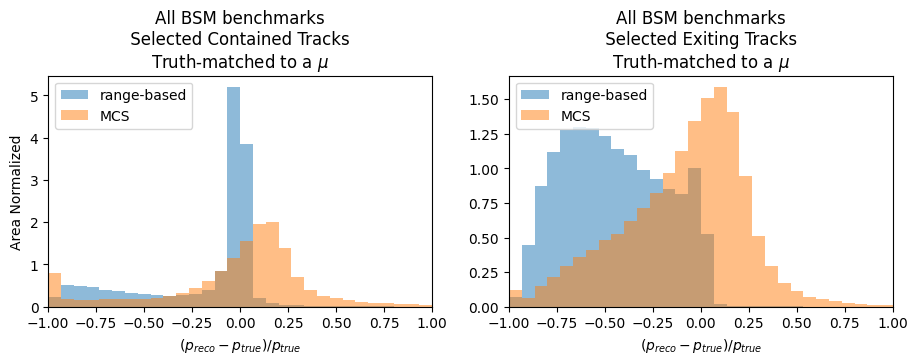

bsm_evtdf.shape:  (515211, 279)
noflags_bsm.shape:  (474461, 279)
bsm_evt not in bad regions:  (485372, 279)
good_tracks.shape:  (447331, 279)
7.02276
Out of range values: 307 / 194777 (=0.15761614564347948 %)
37.328575
Out of range values: 6471 / 194777 (=3.322260841885849 %)
6.2197337
Out of range values: 32 / 135469 (=0.02362164037528881 %)
11.757132
Out of range values: 408 / 135469 (=0.30117591478493233 %)


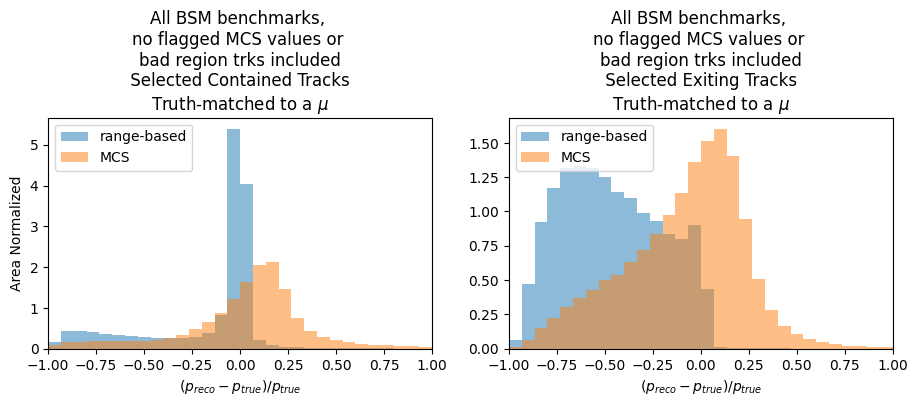

In [44]:
#reco_p_comparison(evtdf, title='BSM + cosmics')

# Cosmics only:
cosmic_evtdf = evtdf[make_categories(evtdf)[-1]]
#reco_p_comparison(cosmic_evtdf, title='Cosmic slices only')

# Combine all the BSM slices:
bsm_evtdf = evtdf.drop(index = evtdf[make_categories(evtdf)[-1]].index) # drop the cosmics
reco_p_comparison(bsm_evtdf, title="All BSM benchmarks", plotname='mcs_vs_range')

#for c in make_categories(evtdf, detailed_bsm=True):
#    reco_p_comparison(evtdf[c], title=c.name)

#cats = make_categories(evtdf, detailed_bsm=True)
#reco_p_comparison(evtdf[cats[-3]], title=cats[-3].name)#+"\n ~ After Jamie's changes to makedf.py ~")

#TODO: Is p_MCS=0 some flagged failure mode? Why does that happen at 2 GeV?

######

# Re-do, with flagged MCS values masked out:

var_t = bsm_evtdf.trunk.trk.mcsP.fwdP_muon
var_b = bsm_evtdf.branch.trk.mcsP.fwdP_muon
mask_minus1 = ((var_t==-1.0) | (var_b==-1.0))
mask_weird = ((var_t==0.01) | (var_b==0.01))
mask_sevenptfive = ((var_t==7.5) | (var_b==7.5))
noflags_bsm = bsm_evtdf[~(mask_minus1 |  mask_weird | mask_sevenptfive)]
print("bsm_evtdf.shape: ", bsm_evtdf.shape)
print("noflags_bsm.shape: ", noflags_bsm.shape)
#reco_p_comparison(noflags_bsm, title="All BSM benchmarks, \nno flagged MCS values included", dosave=True, plotname='mcs_vs_range')

var_t = bsm_evtdf.trunk.trk.end
var_b = bsm_evtdf.branch.trk.end
mask_bad_zones = ((in_new_nonFiducial_zones(var_t)) | (in_new_nonFiducial_zones(var_b))) # defined below
print("bsm_evt not in bad regions: ", bsm_evtdf[~mask_bad_zones].shape)
good_tracks = bsm_evtdf[~(mask_minus1 |  mask_weird | mask_sevenptfive | mask_bad_zones)]
print("good_tracks.shape: ", good_tracks.shape)
reco_p_comparison(good_tracks, title="All BSM benchmarks, \nno flagged MCS values or \nbad region trks included", 
                  plotname='mcs_vs_range')


## WIP: General 2D Plotting Function

In [ ]:
# WIP
def 2d_hist(var1, var2, title='What_sample'):
    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    

## 2D: MCS Performance vs. PID Score

In [45]:
def mcs_vs_muPID(df, title='what sample?'):
    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    
    ybins = 50
    myrange_x = (0,45)
    methods = ['range', 'mcs']
    i=1

    plt.figure(figsize=(10.9,3))

    # Contained

    xvar = np.concatenate((
            df[when_trunk_con].trunk.trk.chi2pid.I2.chi2_muon,
            df[when_branch_con].branch.trk.chi2pid.I2.chi2_muon
        ))

    yvar = np.concatenate((
        (getp(df[when_trunk_con].trunk.trk, methods[i]) - 
         getp(df[when_trunk_con].trunk.trk, 'track_truth'))/getp(df[when_trunk_con].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_con].branch.trk, methods[i]) - 
         getp(df[when_branch_con].branch.trk, 'track_truth'))/getp(df[when_branch_con].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,1)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel("Track $\\chi^2$ Muon (Col. Plane)")
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Selected Contained Tracks')
    plt.show()
    plt.close()


    # Uncontained

    xvar = np.concatenate((
            df[when_trunk_unc].trunk.trk.chi2pid.I2.chi2_muon,
            df[when_branch_unc].branch.trk.chi2pid.I2.chi2_muon
        ))

    yvar = np.concatenate((
        (getp(df[when_trunk_unc].trunk.trk, methods[i]) - 
         getp(df[when_trunk_unc].trunk.trk, 'track_truth'))/getp(df[when_trunk_unc].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_unc].branch.trk, methods[i]) - 
         getp(df[when_branch_unc].branch.trk, 'track_truth'))/getp(df[when_branch_unc].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,2)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('Muon PID score')
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Selected Exiting Tracks')# ≥ 1m')
    plt.show()
    plt.close()

    print('Number of contained tracks: ', np.concatenate((
        df[when_trunk_con].trunk.trk.len, 
        df[when_branch_con].branch.trk.len
    )).shape
         )
    print('Number of uncontained tracks: ', np.concatenate((
        df[when_trunk_unc].trunk.trk.len, 
        df[when_branch_unc].branch.trk.len
    )).shape
         )

<Figure size 1090x300 with 0 Axes>

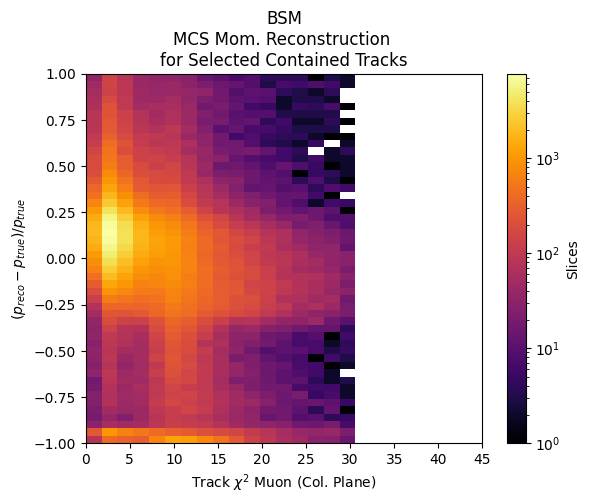

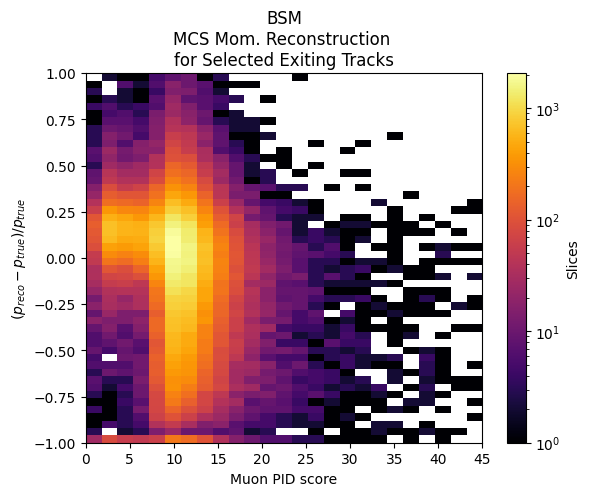

Number of contained tracks:  (231437,)
Number of uncontained tracks:  (98417,)


<Figure size 1090x300 with 0 Axes>

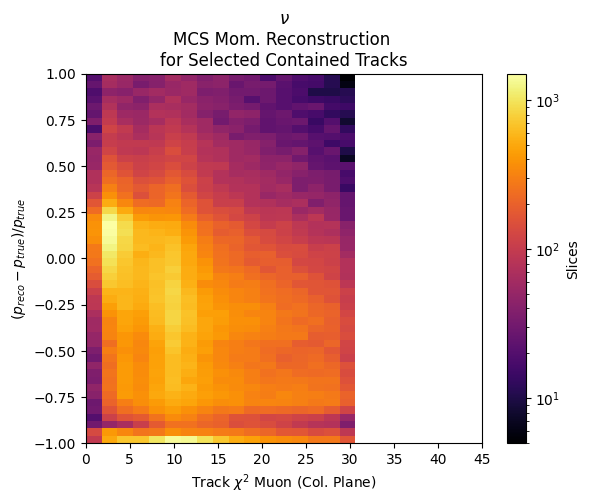

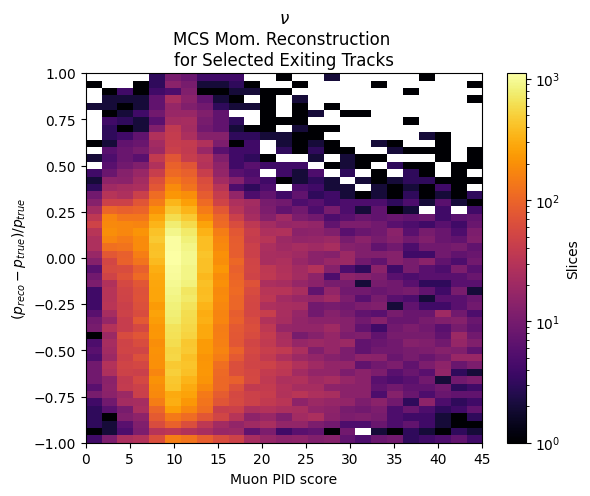

Number of contained tracks:  (219032,)
Number of uncontained tracks:  (78696,)


<Figure size 1090x300 with 0 Axes>

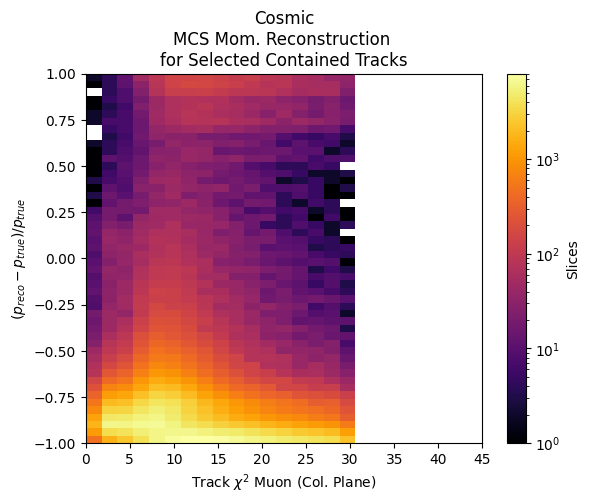

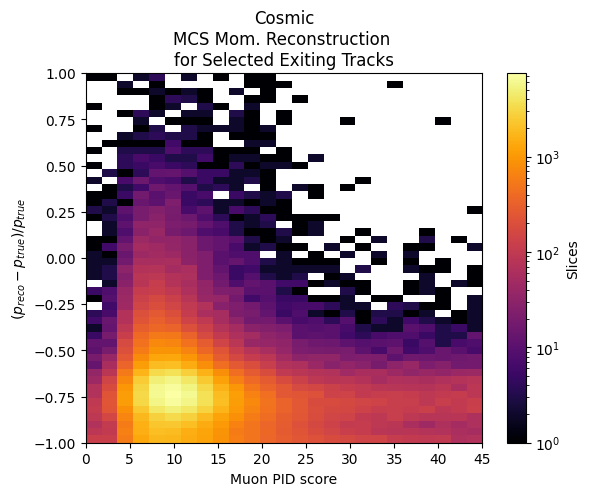

Number of contained tracks:  (485695,)
Number of uncontained tracks:  (260495,)


In [46]:
for c in make_categories(evtdf):
    mcs_vs_muPID(evtdf[c], title=c.name)

## 2D: MCS Performance vs. p_true

In [47]:
# MAKE A 2D VERSION, WITH P_TRUE ON X AXIS:

# CHECK MCS PERFORMANCE AS FUNCTION OF TRUE MOMENTUM.

def mcs_vs_ptrue(df, title='what sample?'):
    
    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    
    ybins = 50
    myrange_x = (0,2)
    methods = ['range', 'mcs']
    i=1

    plt.figure(figsize=(10.9,3))

    # Contained

    xvar = np.concatenate((
            getp(df[when_trunk_con].trunk.trk, 'track_truth'),
            getp(df[when_branch_con].branch.trk, 'track_truth')
        ))

    yvar = np.concatenate((
        (getp(df[when_trunk_con].trunk.trk, methods[i]) - 
         getp(df[when_trunk_con].trunk.trk, 'track_truth'))/getp(df[when_trunk_con].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_con].branch.trk, methods[i]) - 
         getp(df[when_branch_con].branch.trk, 'track_truth'))/getp(df[when_branch_con].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,1)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('$p_{true}$ (GeV)')
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Selected Contained Tracks')
    plt.show()
    plt.close()


    # Uncontained

    xvar = np.concatenate((
            getp(df[when_trunk_unc].trunk.trk, 'track_truth'),
            getp(df[when_branch_unc].branch.trk, 'track_truth')
        ))

    yvar = np.concatenate((
        (getp(df[when_trunk_unc].trunk.trk, methods[i]) - 
         getp(df[when_trunk_unc].trunk.trk, 'track_truth'))/getp(df[when_trunk_unc].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_unc].branch.trk, methods[i]) - 
         getp(df[when_branch_unc].branch.trk, 'track_truth'))/getp(df[when_branch_unc].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,2)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('$p_{true}$ (GeV)')
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Selected Exiting Tracks')# ≥ 1m')
    plt.show()
    plt.close()

    print('Number of contained tracks: ', np.concatenate((
        df[when_trunk_con].trunk.trk.len, 
        df[when_branch_con].branch.trk.len
    )).shape
         )
    print('Number of uncontained tracks: ', np.concatenate((
        df[when_trunk_unc].trunk.trk.len, 
        df[when_branch_unc].branch.trk.len
    )).shape
         )

<Figure size 1090x300 with 0 Axes>

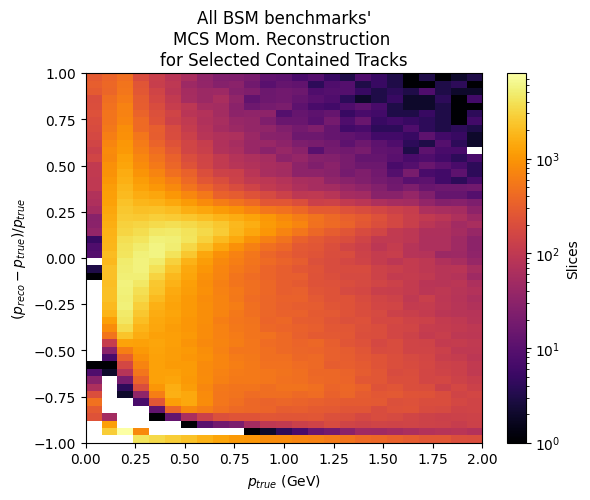

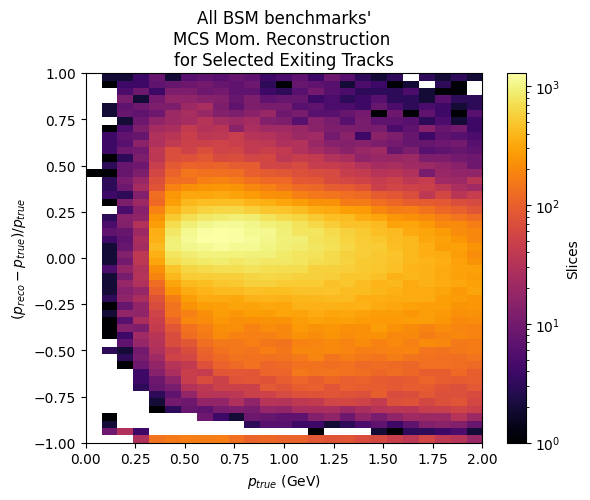

Number of contained tracks:  (738132,)
Number of uncontained tracks:  (292290,)


In [48]:
# Combine all the BSM slices:
bsm_evtdf = evtdf.drop(index = evtdf[make_categories(evtdf)[-1]].index) # drop the cosmics
mcs_vs_ptrue(bsm_evtdf, title="All BSM benchmarks'")

#cats = make_categories(evtdf, detailed_bsm=True)
#mcs_vs_ptrue(bsm_evtdf[cats[-3]], title=cats[-3].name)

## 2D: MCS Performance vs. Track Length

In [50]:
# CHECK MCS PERFORMANCE AS FUNCTION OF TRACK LENGTH.

def mcs_vs_trklen(df, title='what sample?'):
    
    when_trunk_con = SlcInFV(df.slc.vertex) & TrkInFV(df.trunk.trk.end) 
    when_trunk_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.trunk.trk.end)
    when_branch_con = SlcInFV(df.slc.vertex) & TrkInFV(df.branch.trk.end)
    when_branch_unc = SlcInFV(df.slc.vertex) & ~TrkInFV(df.branch.trk.end)
    
    ybins = 50
    myrange_x = (0,600)
    methods = ['range', 'mcs']
    i=1

    plt.figure(figsize=(10.9,3))

    # Contained

    xvar = np.concatenate((
        df[when_trunk_con].trunk.trk.len, 
        df[when_branch_con].branch.trk.len
    ))

    yvar = np.concatenate((
        (getp(df[when_trunk_con].trunk.trk, methods[i]) - 
         getp(df[when_trunk_con].trunk.trk, 'track_truth'))/getp(df[when_trunk_con].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_con].branch.trk, methods[i]) - 
         getp(df[when_branch_con].branch.trk, 'track_truth'))/getp(df[when_branch_con].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,1)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('Track Length (cm)')
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Contained Tracks')
    plt.show()
    plt.close()


    # Uncontained

    xvar = np.concatenate((
        df[when_trunk_unc].trunk.trk.len, 
        df[when_branch_unc].branch.trk.len
    ))

    yvar = np.concatenate((
        (getp(df[when_trunk_unc].trunk.trk, methods[i]) - 
         getp(df[when_trunk_unc].trunk.trk, 'track_truth'))/getp(df[when_trunk_unc].trunk.trk, 'track_truth'), 
        (getp(df[when_branch_unc].branch.trk, methods[i]) - 
         getp(df[when_branch_unc].branch.trk, 'track_truth'))/getp(df[when_branch_unc].branch.trk, 'track_truth') 
    ))

    fig, ax = plt.subplots(ncols=1)
    #fig, ax = plt.subplot(1,2,2)
    hb, xedges, yedges, im = ax.hist2d(xvar, 
                                       yvar, 
                                       bins=[25, ybins], norm=mpl.colors.LogNorm(),
                                       cmin=1, cmap='inferno', range=(myrange_x,(-1,1)))
    fig.colorbar(im, ax=ax, label="Slices")#, "log10(Entries)")
    plt.xlabel('Track Length (cm)')
    plt.ylabel('$(p_{reco} - p_{true})/p_{true}$')
    plt.title(title+'\nMCS Mom. Reconstruction \nfor Exiting Tracks ≥ 1m')
    plt.show()
    plt.close()

    print('Number of contained tracks: ', np.concatenate((
        df[when_trunk_con].trunk.trk.len, 
        df[when_branch_con].branch.trk.len
    )).shape
         )
    print('Number of uncontained tracks: ', np.concatenate((
        df[when_trunk_unc].trunk.trk.len, 
        df[when_branch_unc].branch.trk.len
    )).shape
         )

<Figure size 1090x300 with 0 Axes>

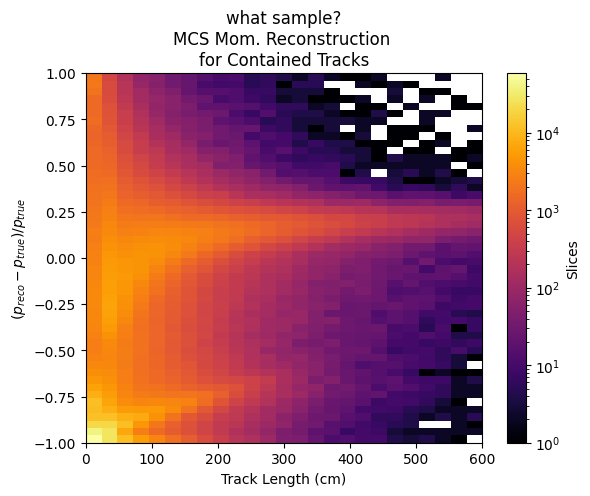

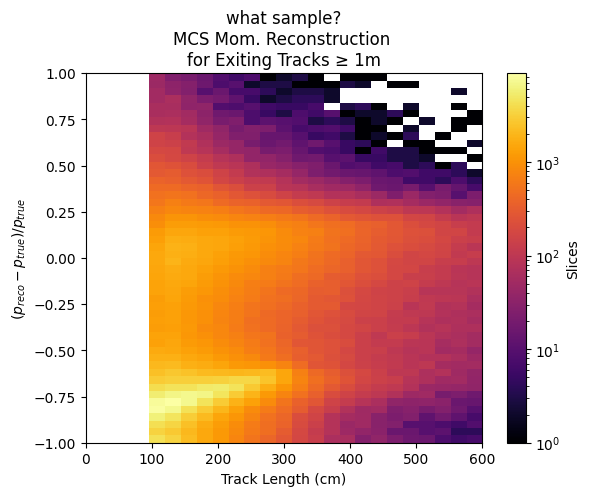

Number of contained tracks:  (1223827,)
Number of uncontained tracks:  (552785,)


In [51]:
mcs_vs_trklen(evtdf)

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


<Figure size 1090x300 with 0 Axes>

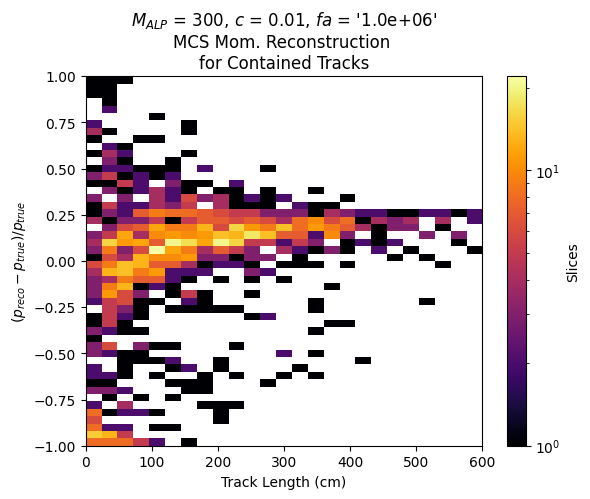

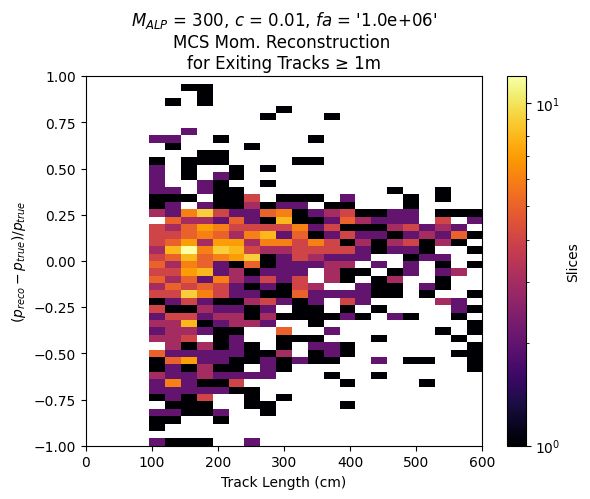

Number of contained tracks:  (1559,)
Number of uncontained tracks:  (1191,)


In [52]:
cats = make_categories(evtdf, detailed_bsm=True)
for c in cats:
    print(c.name)
mcs_vs_trklen(evtdf[cats[-3]], title=cats[-3].name)

## Check MCS Performance as a function of Fit score

In [53]:
#for c in evtdf.columns: print(c)
# Nevermind! (For now!) - The score is not in the dataframes.